# Detección de anomalías en un marco de auditoría continua

## Links

PaySim:

- https://github.com/EdgarLopezPhD/PaySim
- https://www.kaggle.com/ealaxi/paysim1

Link GitHub:

- https://github.com/albertofalco/continous_audit_anomalies

Análisis exploratorio:

- https://github.com/pandas-profiling/pandas-profiling

Optimización de parámetros:

- https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f
- https://proceedings.neurips.cc/paper/2011/file/86e8f7ab32cfd12577bc2619bc635690-Paper.pdf
- http://proceedings.mlr.press/v28/bergstra13.pdf
- https://static.sigopt.com/b/20a144d208ef255d3b981ce419667ec25d8412e2/static/pdf/SigOpt_Bayesian_Optimization_Primer.pdf
- https://www.cs.ox.ac.uk/people/nando.defreitas/publications/BayesOptLoop.pdf
- https://machinelearningmastery.com/what-is-bayesian-optimization
- https://towardsdatascience.com/optimise-your-hyperparameter-tuning-with-hyperopt-861573239eb5
- https://github.com/hyperopt/hyperopt/wiki/FMin
- https://github.com/hyperopt
- https://www.youtube.com/watch?v=tdwgR1AqQ8Y
- https://www.youtube.com/watch?v=5nYqK-HaoKY
- https://towardsdatascience.com/hyperparameters-optimization-526348bb8e2d


## 6. Implementación de modelos

### 6.1. Split del dataset

Split del dataset para reservar un conjunto de datos para validación posterior al entrenamiento y desarrollo de los modelos.

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import os
import time
import joblib

In [2]:
# Filtro de warnings.
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Carga del dataset.
df = pd.read_csv('df_preprocessed.csv')
df.head()

,day,hour,amount,idOrig,oldbalanceOrig,newbalanceOrig,idDest,oldbalanceDest,newbalanceDest,Cash_in,Cash_out,Debit,Payment,Transfer,isFraud,isFlaggedFraud
0,1,1,9839.64,0,170136.0,160296.36,6353307,0.0,0.0,0,0,0,1,0,0,0
1,1,1,1864.28,1,21249.0,19384.72,6353308,0.0,0.0,0,0,0,1,0,0,0
2,1,1,181.00,2,181.0,0.00,6353309,0.0,0.0,0,0,0,0,1,1,0
3,1,1,181.00,3,181.0,0.00,6353310,21182.0,0.0,0,1,0,0,0,1,0
4,1,1,11668.14,4,41554.0,29885.86,6353311,0.0,0.0,0,0,0,1,0,0,0


In [4]:
# Split del dataset para reservar un conjunto de validación.
from sklearn.model_selection import train_test_split
df_training, df_validation = train_test_split(df, test_size = 0.2, random_state = 42, shuffle = True, stratify = np.array(df['isFraud']))

In [5]:
# Control de frecuencias de clases.
print('Proporcion de clases para dataset de training: %.4f' % (df_training['isFraud'].value_counts()[1] / df_training['isFraud'].value_counts()[0]))
print('Proporcion de clases para dataset de validación: %.4f' % (df_validation['isFraud'].value_counts()[1] / df_validation['isFraud'].value_counts()[0]))

Proporcion de clases para dataset de training: 0.0013
Proporcion de clases para dataset de validación: 0.0013


### 6.2. Entrenamiento de modelos

#### 6.2.1. Separación del dataset en variable a predecir y predictores

In [6]:
# Separación del dataset
X = df_training.drop(labels = ['isFraud', 'isFlaggedFraud'], axis = 1, inplace = False)
y = df_training['isFraud']

Validación cruzada

In [ ]:
# Importación de librerías.
# from sklearn.model_selection import KFold

In [ ]:
# Creación de objeto K-Fold.
# kf = KFold(n_splits = 5, shuffle = False)

In [ ]:
# CV tradicional sin shuffle.
# i = 0
# for train, test in kf.split(df):
#     i += 1
#     print('Iteración %i Train - %.2f %%' % (i, df.loc[train, 'isFraud'].value_counts()[1] / df.loc[train, 'isFraud'].value_counts()[0] * 100))
#     print('Iteración %i Test - %.2f %%' % (i, df.loc[test, 'isFraud'].value_counts()[1] / df.loc[test, 'isFraud'].value_counts()[0] * 100))

In [ ]:
# Importación de librerías.
# from sklearn.model_selection import StratifiedKFold, KFold

In [ ]:
# Creación de objeto stratified fold.
# skf = StratifiedKFold(n_splits = 5)

In [ ]:
# Obtención de frecuencias de fraudes con validación cruzada estratificada.
# i = 0
# for train, test in skf.split(X = df.iloc[:, 0:10], y = df['isFraud']):
#     i += 1
#     print('Iteración %i Train - %.2f %%' % (i, df.loc[train, 'isFraud'].value_counts()[1] / df.loc[train, 'isFraud'].value_counts()[0] * 100))
#     print('Iteración %i Test - %.2f %%' % (i, df.loc[test, 'isFraud'].value_counts()[1] / df.loc[test, 'isFraud'].value_counts()[0] * 100))

Balanceo de datos

#### 6.2.2. Árboles de Decisión (Decision trees)

Cross validation: Iteración manual

In [ ]:
# Iteración manual para aplicar el algoritmo de arboles de decision (Decision Tree).
# from sklearn.model_selection import StratifiedKFold, KFold
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score

# skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2022)
# clf = DecisionTreeClassifier(max_depth = 3)

# i = 0

# start_time = time.time()
# for train, test in skf.split(X = X, y = y):
#     i += 1
#     X_train = X.iloc[train, :]
#     y_train = y[train]
#     X_test = X.iloc[test, :]
#     y_test = y[test]
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     acc = accuracy_score(y_true = y_test, y_pred = y_pred)
#     print('Iteración %i: %f' % (i, acc))
# print("--- %.2f seconds ---" % (time.time() - start_time))

In [ ]:
# Iteración manual para aplicar el algoritmo de arboles de decision (Decision Tree). 
# Parallel execution.

# from sklearn.model_selection import StratifiedKFold, KFold
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score
# from joblib import Parallel, delayed

# skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2022)
# clf = DecisionTreeClassifier(max_depth = 3)

# def process(train, test):
#     X_train = X.iloc[train, :]
#     y_train = y[train]
#     X_test = X.iloc[test, :]
#     y_test = y[test]
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     acc = accuracy_score(y_true = y_test, y_pred = y_pred)
#     return acc

# results = Parallel(n_jobs=-1, verbose = 50)(delayed(process)(train, test) for train, test in skf.split(X = X, y = y))
# print(results)

In [ ]:
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# print('Precision: {x:%}'.format(x = precision_score(y_true = y_test, y_pred = y_pred)))
# print('Recall o sensibilidad: {x:%}'.format(x = recall_score(y_true = y_test, y_pred = y_pred)))

Cross validation: Scikit Learn

In [ ]:
# Ejecución de un cross validation estratificado utilizando el modelo Decision Tree.
# from sklearn.model_selection import StratifiedKFold, KFold
# from sklearn.model_selection import cross_validate
# from sklearn.tree import DecisionTreeClassifier

# start_time = time.time()
# clf = DecisionTreeClassifier(max_depth = 3)
# skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
# cv = cross_validate(estimator = clf, X = X, y = y, cv = skf, verbose = 2, n_jobs = -1, 
#                     scoring = ('accuracy', 'precision', 'recall', 'roc_auc'))
# print("--- %.2f seconds ---" % (time.time() - start_time))

In [ ]:
# Impresión de los scorings del cross validation.
# for i, j in enumerate(cv):
#     print('%f %s with a standard deviation of %f' % (cv[j].mean(), j, cv[j].std()))

Optimización de parámetros nro. 1

In [ ]:
# Optimización de parámetros nro. 1.
# from sklearn.model_selection import StratifiedKFold, KFold
# from sklearn.model_selection import cross_validate
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.utils import parallel_backend

# start_time = time.time()

# dtc = DecisionTreeClassifier(random_state = 42)
# skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
# scoring = ['accuracy', 'precision', 'recall', 'roc_auc']
# parameters = {'max_depth' : [3, 4, 5],
#               'criterion' : ['gini', 'entropy'],
#               'splitter' : ['best', 'random'],
#               'min_samples_split' : [2, 3]} # Min samples = 1 da error.

# clf = GridSearchCV(estimator = dtc, param_grid = parameters, scoring = scoring, refit = 'roc_auc', n_jobs = -1, cv = skf, verbose = 2)

# with parallel_backend('threading'):
#     clf.fit(X = X, y = y)

# print("--- %.2f seconds ---" % (time.time() - start_time))

In [ ]:
# Creación de tabla resumen con scorings.
# from operator import itemgetter

# clf_results = clf.cv_results_
# clf_results = itemgetter('mean_test_accuracy', 'std_test_accuracy', 'mean_test_precision', 'std_test_precision', 'mean_test_recall', 'std_test_recall', 
# 'mean_test_roc_auc', 'std_test_roc_auc')(clf_results)

# scorings_table = pd.DataFrame(clf_results).transpose()
# scorings_table.columns = ['Mean_Accuracy', 'Std_Accuracy', 'Mean_Precision', 'Std_Precision', 'Mean_Recall', 'Std_Recall', 'Mean_AUC', 'Std_AUC']

# params_list = []

# for i in clf.cv_results_['params']:
#     param = []
#     for j, k in i.items():
#         param.append(str(j) + '_' + str(k))
#     param = ' '.join(param)
#     params_list.append(param)

# scorings_table.index = params_list

In [ ]:
# Visualización de la tabla resumen.
# pd.options.display.float_format = '{:.4f}'.format
# scorings_table.sort_values(by = 'Mean_AUC', ascending = False).head(10)

In [ ]:
# Obtención de los mejores parámetros.
# clf.best_params_

Los mejores resultados a partir del primer entrenamiento indican que se aconseja utilizar la entropia como criterio de splitting, la profundidad no menor a 5, el minimo de registros de cada hoja puede ser 2 o 3, y el splitter debe ser best.

Optimización de parámetros nro. 2

In [ ]:
# Optimización de parámetros nro. 2.
# from sklearn.model_selection import StratifiedKFold, KFold
# from sklearn.model_selection import cross_validate
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.utils import parallel_backend

# start_time = time.time()

# dtc = DecisionTreeClassifier(random_state = 42)
# skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
# scoring = ['accuracy', 'precision', 'recall', 'roc_auc']
# parameters = {'max_depth' : [5, 7, 9],
#               'criterion' : ['entropy'],
#               'splitter' : ['best'],
#               'min_samples_split' : [2, 3]} # Min samples = 1 da error.

# clf = GridSearchCV(estimator = dtc, param_grid = parameters, scoring = scoring, refit = 'roc_auc', n_jobs = -1, cv = skf, verbose = 2)
# # GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

# with parallel_backend('threading'):
#     clf.fit(X = X, y = y)

# print("--- %.2f seconds ---" % (time.time() - start_time))

In [ ]:
# Creación de tabla resumen con scorings.
# from operator import itemgetter

# clf_results = clf.cv_results_
# clf_results = itemgetter('mean_test_accuracy', 'std_test_accuracy', 'mean_test_precision', 'std_test_precision', 'mean_test_recall', 'std_test_recall', 'mean_test_roc_auc', 'std_test_roc_auc')(clf_results)

# scorings_table = pd.DataFrame(clf_results).transpose()
# scorings_table.columns = ['Mean_Accuracy', 'Std_Accuracy', 'Mean_Precision', 'Std_Precision', 'Mean_Recall', 'Std_Recall', 'Mean_AUC', 'Std_AUC']

# params_list = []

# for i in clf.cv_results_['params']:
#     param = []
#     for j, k in i.items():
#         param.append(str(j) + '_' + str(k))
#     param = ' '.join(param)
#     params_list.append(param)

# scorings_table.index = params_list

In [ ]:
# Visualización de la tabla resumen.
# pd.options.display.float_format = '{:.4f}'.format
# scorings_table.sort_values(by = 'Mean_AUC', ascending = False).head(10)

In [ ]:
# Obtención de los mejores parámetros.
# clf.best_params_

A partir del segundo entrenamiento, se decide seleccionar en 2 el minimo de cada hoja. De 7 en adelante la profundida del arbol. No se observan aun efectos significativos sobre la varianza al incrementar la profundidad.

Optimización de parámetros nro. 3

In [ ]:
# Optimización de parámetros nro. 3.
# from sklearn.model_selection import StratifiedKFold, KFold
# from sklearn.model_selection import cross_validate
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.utils import parallel_backend

# start_time = time.time()

# dtc = DecisionTreeClassifier(random_state = 42)
# skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
# scoring = ['accuracy', 'precision', 'recall', 'roc_auc']
# parameters = {'max_depth' : [7, 9, 11, 13, 15],
#               'criterion' : ['entropy'],
#               'splitter' : ['best'],
#               'min_samples_split' : [2]} # Min samples = 1 da error.

# clf = GridSearchCV(estimator = dtc, param_grid = parameters, scoring = scoring, refit = 'roc_auc', n_jobs = -1, cv = skf, verbose = 2)
# # GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

# with parallel_backend('threading'):
#     clf.fit(X = X, y = y)

# print("--- %.2f seconds ---" % (time.time() - start_time))

In [ ]:
# Creación de tabla resumen con scorings.
# from operator import itemgetter

# clf_results = clf.cv_results_
# clf_results = itemgetter('mean_test_accuracy', 'std_test_accuracy', 'mean_test_precision', 'std_test_precision', 'mean_test_recall', 'std_test_recall', 'mean_test_roc_auc', 'std_test_roc_auc')(clf_results)

# scorings_table = pd.DataFrame(clf_results).transpose()
# scorings_table.columns = ['Mean_Accuracy', 'Std_Accuracy', 'Mean_Precision', 'Std_Precision', 'Mean_Recall', 'Std_Recall', 'Mean_AUC', 'Std_AUC']

# params_list = []

# for i in clf.cv_results_['params']:
#     param = []
#     for j, k in i.items():
#         param.append(str(j) + '_' + str(k))
#     param = ' '.join(param)
#     params_list.append(param)

# scorings_table.index = params_list

In [ ]:
# Visualización de la tabla resumen.
# pd.options.display.float_format = '{:.4f}'.format
# scorings_table.sort_values(by = 'Mean_AUC', ascending = False).head(10)

In [ ]:
# Obtención de los mejores parámetros.
# clf.best_params_

Si bien el optimizador selecciona como mejor modelo aquel con profundidad 7, se entiende que el recall o tasa de verdaderos positivos se incrementa significativamente a medida que se incrementa este parámetro, a pesar de que se ve comprometida la precisión del modelo.

Optimización de parámetros nro. 4: Halving u optimización selectiva

In [ ]:
# # Uso de halving para la optimizacion de parametros.
# from sklearn.model_selection import StratifiedKFold, KFold
# from sklearn.model_selection import cross_validate
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.experimental import enable_halving_search_cv
# from sklearn.model_selection import HalvingGridSearchCV
# from sklearn.utils import parallel_backend

# start_time = time.time()

# dtc = DecisionTreeClassifier(random_state = 42)
# skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
# scoring = ['accuracy', 'precision', 'recall', 'roc_auc']
# parameters = {'max_depth' : [7, 9, 11, 13, 15],
#               'criterion' : ['entropy'],
#               'splitter' : ['best'],
#               'min_samples_split' : [2]} # Min samples = 1 da error.

# clf = HalvingGridSearchCV(estimator = dtc, param_grid = parameters, scoring = 'recall', refit = True, n_jobs = -1, cv = skf, verbose = 2, random_state = 42)

# # HalvingGridSearchCV(estimator, param_grid, *, factor=3, resource='n_samples', 
# # max_resources='auto', min_resources='exhaust', aggressive_elimination=False, 
# # cv=5, scoring=None, refit=True, error_score=nan, return_train_score=True, random_state=None, n_jobs=None, verbose=0)[source]

# with parallel_backend('threading'):
#     clf.fit(X = X, y = y)

# print("--- %.2f seconds ---" % (time.time() - start_time))

In [ ]:
# # Obtención de los mejores parámetros.
# clf.best_params_

##### 6.2.2.1. Primera optimización de parámetros

Para la optimización de hiperparámetros, se utiliza una alternativa de búsqueda guidada, mediante la implementación de la librería HyperOpt y el algoritmo Tree Parzen Estimator, basado en la Optimización Bayesiana.

In [ ]:
# F1 score, also known as balanced F-score or F-measure.
# The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
# F1 = 2 * (precision * recall) / (precision + recall)
# In the multi-class and multi-label case, this is the average of the F1 score of each class with weighting depending on the average parameter.

# Definición de la función objetivo.
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

# Definición de la función objetivo.
def objective_func(hyperparameters):
    
    global i, scorings
    
    i += 1
    
    clf = DecisionTreeClassifier(random_state = 42, **hyperparameters)
    skf = StratifiedKFold(random_state = 42, n_splits = 4, shuffle = True)
    cv = cross_validate(estimator = clf, X = X, y = y, cv = skf, verbose = False, n_jobs = -1, scoring = ('precision', 'recall', 'roc_auc', 'accuracy', 'f1'))
        
    loss = 1 - cv['test_f1'].mean()
    
    # Almacenamiento de scorings.
    scorings.append({'trial': i,
                          'params' : clf.get_params(),
                          'scorings' : {'Recall': cv['test_recall'].mean(),
                                        'Precision': cv['test_precision'].mean(),
                                        'AUC': cv['test_roc_auc'].mean(),
                                        'Accuracy': cv['test_accuracy'].mean(),
                                        'Recall_Std': cv['test_recall'].std(),
                                        'Precision_Std': cv['test_precision'].std(),
                                        'AUC_Std': cv['test_roc_auc'].std(),
                                        'Accuracy_Std': cv['test_accuracy'].std(),
                                        'F1-Score': 1 - loss}
                         }
                        )
    
    return loss

In [ ]:
# Ejecución del optimizador.
from hyperopt import fmin, tpe, hp, space_eval, Trials
from hyperopt.early_stop import no_progress_loss

start_time = time.time()

# Definición del espacio / dominio de parámetros.
search_space = {'criterion' : hp.choice('criterion', ['entropy', 'gini']),
                'splitter' : hp.choice('splitter', ['best', 'random']),
                'max_depth' : hp.qnormal('max_depth', 12, 5, 1),
                'min_samples_split' : hp.choice('min_samples_split', [2, 3]),
                'min_samples_leaf' : hp.choice('min_samples_leaf', [1, 2, 3]),
                'class_weight' : hp.choice('class_weight', [None, 'balanced'])}

# Implementación de Hyperopt
i = -1
scorings = list()
rstate = np.random.default_rng(42)
trials = Trials() # Para el logging de resultados.
best_params = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, max_evals = 100, trials = trials, early_stop_fn = no_progress_loss(20), rstate = rstate)

In [ ]:
# Impresión de resultados.
print('Trial ID :', trials.best_trial['tid'])
print('Loss :', trials.best_trial['result']['loss'])
print('Best Params :', space_eval(search_space, best_params), end = '\n\n')

In [ ]:
# Exportación de resultados a formato JSON.
from datetime import datetime
import json

try:
    os.mkdir('HyperOpt Optimizations')
except:
    None

now = datetime.now()
dt_string = now.strftime("%Y%m%d_%H%M%S")
path = os.getcwd() + '\\HyperOpt Optimizations\\'
filename = 'Opt_' + dt_string + '.json'

f = open(path + filename, 'w')
json.dump(scorings, f)
f.close()

print(dt_string)

In [ ]:
# Obtención de resultados en formato tabla para visualizar scorings y desvios estándar.
scorings_df = pd.DataFrame(columns = list(scorings[0]['scorings'].keys()))

for scoring in scorings:
    scorings_df = scorings_df.append(scoring['scorings'], ignore_index = True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 1000):  # more options can be specified also
    print(scorings_df)

In [ ]:
# Gráfico comparativo de rendimiento: Criterion.
import matplotlib.pyplot as plt

df_plot = pd.DataFrame(columns = ['trial', 'param', 'score'])

for scoring in scorings:
    df_plot = df_plot.append({'trial' : scoring['trial'], 
                              'param' : scoring['params']['criterion'], 
                              'score' : scoring['scorings']['F1-Score']},
                             ignore_index = True)

plt = df_plot.pivot(columns = 'param', values ='score').plot(kind = 'bar')

El criterio que clasifica mejor es 'entropy'.

In [ ]:
# Gráfico comparativo de rendimiento: Splitter.
import matplotlib.pyplot as plt

df_plot = pd.DataFrame(columns = ['trial', 'param', 'score'])

for scoring in scorings:
    df_plot = df_plot.append({'trial' : scoring['trial'], 
                              'param' : scoring['params']['splitter'], 
                              'score' : scoring['scorings']['F1-Score']},
                             ignore_index = True)
    
plt = df_plot.pivot(columns = 'param', values ='score').plot(kind = 'bar')

El splitter que clasifica mejor es "best".

In [ ]:
# Gráfico comparativo de rendimiento: Class_Weight.
import matplotlib.pyplot as plt

df_plot = pd.DataFrame(columns = ['trial', 'param', 'score'])

for scoring in scorings:
    df_plot = df_plot.append({'trial' : scoring['trial'], 
                              'param' : scoring['params']['class_weight'], 
                              'score' : scoring['scorings']['F1-Score']},
                             ignore_index = True)

df_plot = df_plot.fillna(value = 'none')
    
plt = df_plot.pivot(columns = 'param', values ='score').plot(kind = 'bar')

La no aplicación de pesos por clases desbalanceadas otorga una mejor perfomance al modelo.

##### 6.2.2.1. Segunda optimización de hiperparámetros

In [ ]:
# Ejecución del optimizador.
from hyperopt import fmin, tpe, hp, space_eval, Trials
from hyperopt.early_stop import no_progress_loss
from math import log

start_time = time.time()

# Definición del espacio / dominio de parámetros.
search_space = {'criterion' : hp.choice('criterion', ['entropy']),
                'splitter' : hp.choice('splitter', ['best']),
                'max_depth' : hp.qlognormal('max_depth', log(12), log(5), 1),
                'min_samples_split' : hp.choice('min_samples_split', range(2, 11)),
                'min_samples_leaf' : hp.choice('min_samples_leaf', range(2, 11)),
                'class_weight' : hp.choice('class_weight', [None])}

# Implementación de Hyperopt
i = -1
scorings = list()
rstate = np.random.default_rng(42)
trials = Trials() # Para el logging de resultados.
best_params = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, max_evals = 100, trials = trials, early_stop_fn = no_progress_loss(50), rstate = rstate)

In [ ]:
# Impresión de resultados.
print('Trial ID :', trials.best_trial['tid'])
print('Loss :', trials.best_trial['result']['loss'])
print('Best Params :', space_eval(search_space, best_params), end = '\n\n')

In [ ]:
# Exportación de resultados a formato JSON.
from datetime import datetime
import json

try:
    os.mkdir('HyperOpt Optimizations')
except:
    None

now = datetime.now()
dt_string = now.strftime("%Y%m%d_%H%M%S")
path = os.getcwd() + '\\HyperOpt Optimizations\\'
filename = 'Opt_' + dt_string + '.json'

f = open(path + filename, 'w')
json.dump(scorings, f)
f.close()

print(dt_string)

In [ ]:
# Obtención de resultados en formato tabla para visualizar scorings y desvios estándar.
scorings_df = pd.DataFrame(columns = list(scorings[0]['scorings'].keys()))

for scoring in scorings:
    scorings_df = scorings_df.append(scoring['scorings'], ignore_index = True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 1000):  # more options can be specified also
    print(scorings_df)

##### 6.2.2.3. Tercera optimización de hiperparámetros

In [ ]:
# F1 score, also known as balanced F-score or F-measure.
# The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
# F1 = 2 * (precision * recall) / (precision + recall)
# In the multi-class and multi-label case, this is the average of the F1 score of each class with weighting depending on the average parameter.

# Definición de la función objetivo.
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

# Definición de la función objetivo.
def objective_func(hyperparameters):
    
    global i, scorings
    
    i += 1
    
    clf = DecisionTreeClassifier(random_state = 42, **hyperparameters)
    skf = StratifiedKFold(random_state = 42, n_splits = 4, shuffle = True)
    cv = cross_validate(estimator = clf, X = X, y = y, cv = skf, verbose = False, n_jobs = -1, scoring = ('precision', 'recall', 'roc_auc', 'accuracy', 'f1'))
        
    loss = 1 - cv['test_f1'].mean() + cv['test_f1'].std()
    
    # Almacenamiento de scorings.
    scorings.append({'trial': i,
                          'params' : clf.get_params(),
                          'scorings' : {'Recall': cv['test_recall'].mean(),
                                        'Precision': cv['test_precision'].mean(),
                                        'AUC': cv['test_roc_auc'].mean(),
                                        'Accuracy': cv['test_accuracy'].mean(),
                                        'Recall_Std': cv['test_recall'].std(),
                                        'Precision_Std': cv['test_precision'].std(),
                                        'AUC_Std': cv['test_roc_auc'].std(),
                                        'Accuracy_Std': cv['test_accuracy'].std(),
                                        'F1-Score': cv['test_f1'].mean()}
                         }
                        )
    
    return loss

In [ ]:
# Ejecución del optimizador.
from hyperopt import fmin, tpe, hp, space_eval, Trials
from hyperopt.early_stop import no_progress_loss

start_time = time.time()

# Definición del espacio / dominio de parámetros.
search_space = {'criterion' : hp.choice('criterion', ['entropy', 'gini']),
                'splitter' : hp.choice('splitter', ['best', 'random']),
                'max_depth' : hp.qnormal('max_depth', 12, 5, 1),
                'min_samples_split' : hp.choice('min_samples_split', [2, 3]),
                'min_samples_leaf' : hp.choice('min_samples_leaf', [1, 2, 3]),
                'class_weight' : hp.choice('class_weight', [None, 'balanced'])}

# Implementación de Hyperopt
i = -1
scorings = list()
rstate = np.random.default_rng(42)
trials = Trials() # Para el logging de resultados.
best_params = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, max_evals = 100, trials = trials, early_stop_fn = no_progress_loss(20), rstate = rstate)

print("--- %.2f seconds ---" % (time.time() - start_time))

In [ ]:
# Impresión de resultados.
print('Trial ID :', trials.best_trial['tid'])
print('Loss :', trials.best_trial['result']['loss'])
print('Best Params :', space_eval(search_space, best_params), end = '\n\n')

In [ ]:
# Exportación de resultados a formato JSON.
from datetime import datetime
import json

try:
    os.mkdir('HyperOpt Optimizations')
except:
    None

now = datetime.now()
dt_string = now.strftime("%Y%m%d_%H%M%S")
path = os.getcwd() + '\\HyperOpt Optimizations\\'
filename = 'Opt_' + dt_string + '.json'

f = open(path + filename, 'w')
json.dump(scorings, f)
f.close()

print(dt_string)

In [ ]:
# Obtención de resultados en formato tabla para visualizar scorings y desvios estándar.
scorings_df = pd.DataFrame(columns = list(scorings[0]['scorings'].keys()))

for scoring in scorings:
    scorings_df = scorings_df.append(scoring['scorings'], ignore_index = True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 1000):  # more options can be specified also
    print(scorings_df)

In [ ]:
import matplotlib.pyplot as plt
max_depth_i = [scoring['params']['max_depth'] for scoring in scorings]
plt.scatter(x = range(len(max_depth_i)), y = max_depth_i)

In [ ]:
import matplotlib.pyplot as plt
min_samples_leaf_i = [scoring['params']['min_samples_leaf'] for scoring in scorings]
plt.scatter(x = range(len(min_samples_leaf_i)), y = min_samples_leaf_i)

In [ ]:
import matplotlib.pyplot as plt
min_samples_split_i = [scoring['params']['min_samples_split'] for scoring in scorings]
plt.scatter(x = range(len(min_samples_split_i)), y = min_samples_split_i)

##### 6.2.2.4. Evaluación de perfomance con el conjunto de validación

In [ ]:
# Representación gráfica
# https://mljar.com/blog/visualize-decision-tree/

# Trial ID : 30
# Loss : 0.12165929643760158
# Best Params : {'class_weight': None, 'criterion': 'entropy', 'max_depth': 29.0, 'min_samples_leaf': 3, 'min_samples_split': 3, 'splitter': 'best'}

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.tree import plot_tree

params = {'class_weight': None, 'criterion': 'entropy', 'max_depth': 29.0, 'min_samples_leaf': 3, 'min_samples_split': 3, 'splitter': 'best'}
clf = DecisionTreeClassifier(random_state = 42, **params)
clf.fit(X = X, y = y)

text_representation = export_text(clf, show_weights = True, max_depth = 5, feature_names = list(X.columns))
print(text_representation)

fig = plt.figure(figsize=(25,20))
fig = plot_tree(clf, max_depth = 4, fontsize = 12, feature_names = X.columns, proportion = True, filled = True)

In [ ]:
# Weights de los atributos.
print(pd.DataFrame(data = (clf.feature_names_in_, clf.feature_importances_)).transpose().sort_values(1, ascending = False))

In [ ]:
# Evaluación con el conjunto de validación.
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

X_test = df_validation.drop(labels = ['isFraud', 'isFlaggedFraud'], axis = 1, inplace = False)
y_test = df_validation['isFraud']

y_pred = clf.predict(X_test)

print('Recall: %.4f' % recall_score(y_true = y_test, y_pred = y_pred))
print('Precision: %.4f' % precision_score(y_true = y_test, y_pred = y_pred))
print('AUC: %.4f' % roc_auc_score(y_true = y_test, y_score = y_pred))
print('Accuracy: %.4f' % accuracy_score(y_true = y_test, y_pred = y_pred))
print('F1-Score: %.4f' % f1_score(y_true = y_test, y_pred = y_pred))

#### 6.2.3. SVM

##### 6.2.3.1. Ingeniería de predictores Nro. 1

Se evalua la eliminación de algunos atributos (día y hora de la operación y códigos de identificación de originante y destinatario, en estos dos últimos casos considerando la naturaleza del modelo).

In [ ]:
%%time
# Definición de la función objetivo.
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
import itertools

splitter = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
indexes = [i[1] for i in splitter.split(X, y)]

# Función objetivo.
def objective_func(selected_columns, index):

    global i, scorings
    
    i += 1
      
    X2 = X.iloc[index, :].drop(selected_columns, axis = 1)
    y2 = y.iloc[index]
    
    clf = SVC(random_state = 42)
    skf = StratifiedKFold(random_state = 42, n_splits = 4, shuffle = True)
    cv = cross_validate(estimator = clf, X = X2, y = y2, cv = skf, verbose = 0, n_jobs = -1, scoring = ('precision', 'recall', 'roc_auc', 'accuracy', 'f1'))
        
    loss = 1 - cv['test_f1'].mean() + cv['test_f1'].std()
    
    # Almacenamiento de scorings.
    scorings.append({'trial': i,
                          'params' : clf.get_params(),
                          'scorings' : {'Recall': cv['test_recall'].mean(),
                                        'Precision': cv['test_precision'].mean(),
                                        'AUC': cv['test_roc_auc'].mean(),
                                        'Accuracy': cv['test_accuracy'].mean(),
                                        'Recall_Std': cv['test_recall'].std(),
                                        'Precision_Std': cv['test_precision'].std(),
                                        'AUC_Std': cv['test_roc_auc'].std(),
                                        'Accuracy_Std': cv['test_accuracy'].std(),
                                        'F1-Score': cv['test_f1'].mean()}
                         }
                        )
    
    return loss

# Espacio de soluciones.
items =  ['day', 'hour', 'idOrig', 'idDest']
combinations = []
for item in range(0, len(items) + 1):
    for subset in itertools.combinations(items, item):
        combinations.append(list(subset))

# Ejecución del iterador.
i = -1
scorings = []
output = []
for selected_columns in combinations:
    start_time = time.time()
    loss = objective_func(selected_columns, range(500000))
    output.append(loss)
    elapsed_time = time.time() - start_time
    print('Columns: ', selected_columns, '| Loss : ', loss, '| Elapsed time: ', elapsed_time)

In [ ]:
# Exportación de resultados a formato JSON.
from datetime import datetime
import json

try:
    os.mkdir('HyperOpt Optimizations')
except:
    None

now = datetime.now()
dt_string = now.strftime("%Y%m%d_%H%M%S")
path = os.getcwd() + '\\HyperOpt Optimizations\\'
filename = 'Opt_' + dt_string + '.json'

f = open(path + filename, 'w')
json.dump(scorings, f)
f.close()

print(dt_string)

In [ ]:
# Obtención de resultados en formato tabla para visualizar scorings y desvios estándar.
scorings_df = pd.DataFrame(columns = list(scorings[0]['scorings'].keys()))

for scoring in scorings:
    scorings_df = scorings_df.append(scoring['scorings'], ignore_index = True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 1000):  # more options can be specified also
    print(scorings_df)

##### 6.2.3.2. Ingeniería de predictores Nro. 2

Se evalua el impacto de la aplicación de distintos métodos de estandarización de atributos.

Escalamiento de atributos a un mínimo de 0 y máximo de 1.

Se eliminan las columnas 'day', 'hour', 'idOrig' e 'idDest'.

In [10]:
# Definición de la función objetivo.
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
import itertools

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit

selected_columns = ['day', 'hour', 'idOrig', 'idDest']
splitter = ShuffleSplit(n_splits = 1, train_size = 0.01, random_state = 42)
index = range(500000) # list([train for train, test in splitter.split(X)])[0]

# Función objetivo.
def objective_func(selected_columns, index):
    
    global i, scorings
    
    start_time = time.time()
    
    i += 1
      
    X2 = X.iloc[index, :].drop(selected_columns, axis = 1)
    y2 = y.iloc[index]
    
    clf = SVC(random_state = 42)
    skf = StratifiedKFold(random_state = 42, n_splits = 4, shuffle = True)
    cv = cross_validate(estimator = clf, X = X2, y = y2, cv = skf, verbose = 0, n_jobs = -1, scoring = ('precision', 'recall', 'roc_auc', 'accuracy', 'f1'))
        
    loss = 1 - cv['test_f1'].mean() + cv['test_f1'].std()
    
    # Almacenamiento de scorings.
    scorings.append({'trial': i,
                      'params' : clf.get_params(),
                      'scorings' : {'Recall': cv['test_recall'].mean(),
                                    'Precision': cv['test_precision'].mean(),
                                    'AUC': cv['test_roc_auc'].mean(),
                                    'Accuracy': cv['test_accuracy'].mean(),
                                    'Recall_Std': cv['test_recall'].std(),
                                    'Precision_Std': cv['test_precision'].std(),
                                    'AUC_Std': cv['test_roc_auc'].std(),
                                    'Accuracy_Std': cv['test_accuracy'].std(),
                                    'F1-Score': cv['test_f1'].mean()}
                         }
                        )
    
    elapsed_time = time.time() - start_time
    print('Selected Columns: %s | Indexes: %s | Loss: %.4f | Elapsed_time: %.4f seconds' % (selected_columns, index, loss, elapsed_time))
    
    return loss

# Ejecución del iterador.
i = -1
scorings = []

objective_func(selected_columns, index)

Selected Columns: ['day', 'hour', 'idOrig', 'idDest'] | Indexes: range(0, 500000) | Loss: 0.6108 | Elapsed_time: 166.7252 seconds


0.610799729466161

In [9]:
# Definición de la función objetivo.
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
import itertools

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit

selected_columns = ['day', 'hour', 'idOrig', 'idDest']
combinations = {0: MinMaxScaler((0, 1)),
                1: MinMaxScaler((-1, 1)),
                2: MaxAbsScaler(),
                3: StandardScaler()
               }
splitter = ShuffleSplit(n_splits = 1, train_size = 0.01, random_state = 42)
index = range(500000) # list([train for train, test in splitter.split(X)])[0]

# Función objetivo.
def objective_func(selected_columns, index, scaler):
    
    global i, scorings
    
    start_time = time.time()
    
    i += 1
      
    X2 = X.iloc[index, :].drop(selected_columns, axis = 1)
    X2 = scaler.fit_transform(X2)
    y2 = y.iloc[index]
    
    clf = SVC(random_state = 42)
    skf = StratifiedKFold(random_state = 42, n_splits = 4, shuffle = True)
    cv = cross_validate(estimator = clf, X = X2, y = y2, cv = skf, verbose = 0, n_jobs = -1, scoring = ('precision', 'recall', 'roc_auc', 'accuracy', 'f1'))
        
    loss = 1 - cv['test_f1'].mean() + cv['test_f1'].std()
    
    # Almacenamiento de scorings.
    scorings.append({'trial': i,
                      'params' : clf.get_params(),
                      'scorings' : {'Recall': cv['test_recall'].mean(),
                                    'Precision': cv['test_precision'].mean(),
                                    'AUC': cv['test_roc_auc'].mean(),
                                    'Accuracy': cv['test_accuracy'].mean(),
                                    'Recall_Std': cv['test_recall'].std(),
                                    'Precision_Std': cv['test_precision'].std(),
                                    'AUC_Std': cv['test_roc_auc'].std(),
                                    'Accuracy_Std': cv['test_accuracy'].std(),
                                    'F1-Score': cv['test_f1'].mean()}
                         }
                        )
    
    elapsed_time = time.time() - start_time
    print('Selected Columns: %s | Indexes: %s | Loss: %.4f | Elapsed_time: %.4f seconds' % (selected_columns, index, loss, elapsed_time))
    
    return loss

# Ejecución del iterador.
i = -1
scorings = []

for combination in combinations:
    loss = objective_func(selected_columns, index, combinations[combination])

Selected Columns: ['day', 'hour', 'idOrig', 'idDest'] | Indexes: range(0, 500000) | Loss: 0.8206 | Elapsed_time: 54.4394 seconds
Selected Columns: ['day', 'hour', 'idOrig', 'idDest'] | Indexes: range(0, 500000) | Loss: 0.8206 | Elapsed_time: 54.3352 seconds
Selected Columns: ['day', 'hour', 'idOrig', 'idDest'] | Indexes: range(0, 500000) | Loss: 0.8206 | Elapsed_time: 54.0157 seconds
Selected Columns: ['day', 'hour', 'idOrig', 'idDest'] | Indexes: range(0, 500000) | Loss: 0.5509 | Elapsed_time: 2457.4731 seconds


El método de estandarización parecería producir mejores resultados que con el dataset original.

##### 6.2.3.3. Ingeniería de predictores Nro. 3

Se evaluan modelos de clasificación de tipo SVM.

A partir de los resultados, se utiliza el modelo LinearSVC.

##### 6.2.3.4. Optimización de hiperparámetros

Se evaluan hiperparámetros del modelo.

In [14]:
# Definición de la función objetivo.
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import LinearSVC
from hyperopt import fmin, hp, tpe, space_eval, Trials
from hyperopt.early_stop import no_progress_loss
from math import exp, log

# Función objetivo.
def objective_func(hyperparameters):
    
    global i, scorings
    
    start_time = time.time()
    
    i += 1
    
    clf = LinearSVC(random_state = 42, **hyperparameters)
    skf = StratifiedKFold(random_state = 42, n_splits = 4, shuffle = True)
    cv = cross_validate(estimator = clf, X = X2, y = y2, cv = skf, verbose = 0, n_jobs = -1, scoring = ('precision', 'recall', 'roc_auc', 'accuracy', 'f1'))
        
    loss = 1 - cv['test_f1'].mean() + cv['test_f1'].std()
    
    # Almacenamiento de scorings.
    scorings.append({'trial': i,
                      'params' : clf.get_params(),
                      'scorings' : {'Recall': cv['test_recall'].mean(),
                                    'Precision': cv['test_precision'].mean(),
                                    'AUC': cv['test_roc_auc'].mean(),
                                    'Accuracy': cv['test_accuracy'].mean(),
                                    'Recall_Std': cv['test_recall'].std(),
                                    'Precision_Std': cv['test_precision'].std(),
                                    'AUC_Std': cv['test_roc_auc'].std(),
                                    'Accuracy_Std': cv['test_accuracy'].std(),
                                    'F1-Score': cv['test_f1'].mean()}
                         }
                        )
    
    elapsed_time = time.time() - start_time
    print('Indexes: %s | Loss: %.4f | Elapsed_time: %.4f seconds' % (index, loss, elapsed_time))
    return loss

# Definición del espacio / dominio de parámetros.
search_space = {'penalty' : hp.choice('penalty', ['l2']),
                'loss' : hp.choice('loss', ['hinge', 'squared_hinge']),
                'C' : hp.lognormal('C', log(1.01), log(1.01))
               }

# Ejecución del iterador.
i = -1
scorings = []
selected_columns = ['day', 'hour', 'idOrig', 'idDest']
index = range(500000)
rstate = np.random.default_rng(42)
trials = Trials() # Para el logging de resultados.
X2 = X.iloc[index, :].drop(selected_columns, axis = 1)
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)
y2 = y.iloc[index]

best_params = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, max_evals = 100, trials = trials, early_stop_fn = no_progress_loss(100), rstate = rstate)

Indexes: range(0, 500000) | Loss: 0.5555 | Elapsed_time: 4.7814 seconds                                                
Indexes: range(0, 500000) | Loss: 0.4816 | Elapsed_time: 9.4228 seconds                                                
Indexes: range(0, 500000) | Loss: 0.5641 | Elapsed_time: 4.7994 seconds                                                
Indexes: range(0, 500000) | Loss: 0.4794 | Elapsed_time: 9.3817 seconds                                                
Indexes: range(0, 500000) | Loss: 0.5514 | Elapsed_time: 4.8792 seconds                                                
Indexes: range(0, 500000) | Loss: 0.4816 | Elapsed_time: 9.8247 seconds                                                
Indexes: range(0, 500000) | Loss: 0.4794 | Elapsed_time: 9.8348 seconds                                                
Indexes: range(0, 500000) | Loss: 0.5641 | Elapsed_time: 4.9029 seconds                                                
Indexes: range(0, 500000) | Loss: 0.5597

In [15]:
# Impresión de resultados.
print('Trial ID :', trials.best_trial['tid'])
print('Loss :', trials.best_trial['result']['loss'])
print('Best Params :', space_eval(search_space, best_params), end = '\n\n')

Trial ID : 71
Loss : 0.475218360409099
Best Params : {'C': 1.2912110784758317, 'loss': 'squared_hinge', 'penalty': 'l2'}



In [16]:
# Exportación de resultados a formato JSON.
from datetime import datetime
import json

try:
    os.mkdir('HyperOpt Optimizations')
except:
    None

now = datetime.now()
dt_string = now.strftime("%Y%m%d_%H%M%S")
path = os.getcwd() + '\\HyperOpt Optimizations\\'
filename= 'Opt_' + dt_string + '.json'

f = open(path + filename, 'w')
json.dump(scorings, f)
f.close()

print(dt_string)

20220223_235233


In [17]:
# Obtención de resultados en formato tabla para visualizar scorings y desvios estándar.
scorings_df = pd.DataFrame(columns = list(scorings[0]['scorings'].keys()))

for scoring in scorings:
    scorings_df = scorings_df.append(scoring['scorings'], ignore_index = True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 1000):  # more options can be specified also
    print(scorings_df)

      Recall Precision       AUC  Accuracy Recall_Std Precision_Std   AUC_Std Accuracy_Std  F1-Score
0   0.312038   0.97118   0.91944  0.999084   0.022316      0.029626  0.015215     0.000038  0.472026
1   0.379028  0.965278  0.975705  0.999166   0.024612      0.016596  0.006858     0.000035  0.543861
2   0.308989   0.97038   0.91889   0.99908   0.026098      0.030968  0.015601     0.000043  0.468358
3   0.380552  0.965511  0.975727  0.999168   0.024314       0.01622  0.006843     0.000033  0.545455
4   0.313562  0.971557  0.919042  0.999086   0.020673      0.028995  0.015458     0.000035  0.473835
5   0.379028  0.965278  0.975633  0.999166   0.024612      0.016596  0.006862     0.000035  0.543861
6   0.380552  0.965511  0.975732  0.999168   0.024314       0.01622  0.006856     0.000033  0.545455
7   0.308989   0.97038  0.918576   0.99908   0.026098      0.030968  0.015512     0.000043  0.468358
8   0.310514  0.970788  0.918822  0.999082   0.024136      0.030283   0.01553     0.000041 

- Penalty L1 no se considera ya que arroja valores nulos como resultado.

In [26]:
# Trial ID : 71
# Loss : 0.475218360409099
# Best Params : {'C': 1.2912110784758317, 'loss': 'squared_hinge', 'penalty': 'l2'}

# Definición de la función objetivo.
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import LinearSVC
from hyperopt import fmin, hp, tpe, space_eval, Trials
from hyperopt.early_stop import no_progress_loss
from math import exp, log

selected_columns = ['day', 'hour', 'idOrig', 'idDest']
index = range(len(X))
X2 = X.iloc[index, :].drop(selected_columns, axis = 1)
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)
y2 = y.iloc[index]

clf = LinearSVC(random_state = 42, C = 1.2912110784758317, loss = 'squared_hinge', penalty = 'l2')
skf = StratifiedKFold(random_state = 42, n_splits = 4, shuffle = True)
cv = cross_validate(estimator = clf, X = X2, y = y2, cv = skf, verbose = 100, 
                    n_jobs = -1, scoring = ('precision', 'recall', 'roc_auc', 'accuracy', 'f1'))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed: 13.0min remaining: 13.0min
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 13.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 13.1min finished


In [28]:
cv

{'fit_time': array([616.38341665, 776.86936903, 785.21293283, 774.09075117]),
 'score_time': array([1.86541891, 1.69338036, 1.70565867, 1.71837807]),
 'test_precision': array([0.96226415, 0.95973154, 0.95230263, 0.96252129]),
 'test_recall': array([0.34165652, 0.34835566, 0.35240414, 0.34388314]),
 'test_roc_auc': array([0.98120764, 0.97787906, 0.98429813, 0.97800003]),
 'test_accuracy': array([0.99913322, 0.99914029, 0.99914108, 0.99913558]),
 'test_f1': array([0.50426966, 0.51117069, 0.51443803, 0.50672646])}

Prueba de scalers

In [19]:
# Trial ID : 71
# Loss : 0.475218360409099
# Best Params : {'C': 1.2912110784758317, 'loss': 'squared_hinge', 'penalty': 'l2'}

# Definición de la función objetivo.
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler, Normalizer, RobustScaler, SplineTransformer
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import StratifiedKFold, cross_validate

selected_columns = ['day', 'hour', 'idOrig', 'idDest']
index = range(len(X))
X2 = X.iloc[index, :].drop(selected_columns, axis = 1)
scaler = RobustScaler()
X2 = scaler.fit_transform(X2)
y2 = y.iloc[index]

clf = LinearSVC(random_state = 42, C = 1.2912110784758317, loss = 'squared_hinge', penalty = 'l2')
skf = StratifiedKFold(random_state = 42, n_splits = 4, shuffle = True)
cv = cross_validate(estimator = clf, X = X2, y = y2, cv = skf, verbose = 100, 
                    n_jobs = -1, scoring = ('precision', 'recall', 'roc_auc', 'accuracy', 'f1'))
cv

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed: 11.3min remaining: 11.3min
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 11.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 11.5min finished


{'fit_time': array([689.1108458 , 681.25003314, 665.69872022, 674.07664204]),
 'score_time': array([1.56001067, 1.64169431, 1.85989785, 1.67200518]),
 'test_precision': array([0.97588424, 0.96636086, 0.96374622, 0.97335423]),
 'test_recall': array([0.36967113, 0.38489647, 0.38831406, 0.37796713]),
 'test_roc_auc': array([0.98589204, 0.98216155, 0.98385578, 0.98459087]),
 'test_accuracy': array([0.99917487, 0.99918901, 0.99919137, 0.99918351]),
 'test_f1': array([0.53621908, 0.55052265, 0.55357918, 0.54449803])}

In [25]:
# Definición de la función objetivo.
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from hyperopt import fmin, hp, tpe, space_eval, Trials
from hyperopt.early_stop import no_progress_loss
from math import exp, log

# Función objetivo.
def objective_func(hyperparameters):
    
    global i, scorings
    
    start_time = time.time()
    
    i += 1
    
    clf = LinearSVC(random_state = 42, C = 1.2912110784758317, loss = 'squared_hinge', penalty = 'l2', **hyperparameters)
    skf = StratifiedKFold(random_state = 42, n_splits = 4, shuffle = True)
    cv = cross_validate(estimator = clf, X = X2, y = y2, cv = skf, verbose = 0, n_jobs = -1, 
                        scoring = ('precision', 'recall', 'roc_auc', 'accuracy', 'f1'))
        
    loss = 1 - cv['test_f1'].mean() + cv['test_f1'].std()
    
    # Almacenamiento de scorings.
    scorings.append({'trial': i,
                      'params' : clf.get_params(),
                      'scorings' : {'Recall': cv['test_recall'].mean(),
                                    'Precision': cv['test_precision'].mean(),
                                    'AUC': cv['test_roc_auc'].mean(),
                                    'Accuracy': cv['test_accuracy'].mean(),
                                    'Recall_Std': cv['test_recall'].std(),
                                    'Precision_Std': cv['test_precision'].std(),
                                    'AUC_Std': cv['test_roc_auc'].std(),
                                    'Accuracy_Std': cv['test_accuracy'].std(),
                                    'F1-Score': cv['test_f1'].mean()}
                         }
                        )
    
    elapsed_time = time.time() - start_time
    print('Indexes: %s | Loss: %.4f | Elapsed_time: %.4f seconds' % (index, loss, elapsed_time))
    return loss

# Definición del espacio / dominio de parámetros.
search_space = {'dual' : hp.choice('dual', [True, False]),
                'tol' : hp.normal('tol', 0.0001, 0.00001),
                'fit_intercept' : hp.choice('fit_intercept', [True, False]),
                'intercept_scaling' : hp.normal('intercept_scaling', 1, 0.01),
                'class_weight' : hp.choice('class_weight', ['balanced', None]),
                'max_iter' : hp.randint('max_iter', 10, 2000)
               }

# Ejecución del iterador.
i = -1
scorings = []
selected_columns = ['day', 'hour', 'idOrig', 'idDest']
index = range(500000)
rstate = np.random.default_rng(42)
trials = Trials() # Para el logging de resultados.
X2 = X.iloc[index, :].drop(selected_columns, axis = 1)
scaler = RobustScaler()
X2 = scaler.fit_transform(X2)
y2 = y.iloc[index]

best_params = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, 
                   max_evals = 100, trials = trials, early_stop_fn = no_progress_loss(100), rstate = rstate)

Indexes: range(0, 500000) | Loss: 0.4372 | Elapsed_time: 14.7694 seconds                                               
Indexes: range(0, 500000) | Loss: 0.9617 | Elapsed_time: 3.0865 seconds                                                
Indexes: range(0, 500000) | Loss: 0.9617 | Elapsed_time: 3.3317 seconds                                                
Indexes: range(0, 500000) | Loss: 0.4140 | Elapsed_time: 7.6651 seconds                                                
Indexes: range(0, 500000) | Loss: 0.8893 | Elapsed_time: 21.6431 seconds                                               
Indexes: range(0, 500000) | Loss: 0.4492 | Elapsed_time: 1.3907 seconds                                                
Indexes: range(0, 500000) | Loss: 0.4137 | Elapsed_time: 4.3753 seconds                                                
Indexes: range(0, 500000) | Loss: 0.9345 | Elapsed_time: 31.9074 seconds                                               
Indexes: range(0, 500000) | Loss: 0.4347

In [27]:
# Impresión de resultados.
print('Trial ID :', trials.best_trial['tid'])
print('Loss :', trials.best_trial['result']['loss'])
print('Best Params :', space_eval(search_space, best_params), end = '\n\n')

Trial ID : 25
Loss : 0.3873657843451594
Best Params : {'class_weight': None, 'dual': True, 'fit_intercept': False, 'intercept_scaling': 1.0058483479571696, 'max_iter': 28, 'tol': 9.320556357088724e-05}



In [33]:
# Exportación de resultados a formato JSON.
from datetime import datetime
import json

try:
    os.mkdir('HyperOpt Optimizations')
except:
    None

now = datetime.now()
dt_string = now.strftime("%Y%m%d_%H%M%S")
path = os.getcwd() + '\\HyperOpt Optimizations\\'
filename = 'Opt_' + dt_string + '.json'

f = open(path + filename, 'w')
json.dump(scorings, f)
f.close()

print(dt_string)

TypeError: Object of type int64 is not JSON serializable

In [32]:
# Obtención de resultados en formato tabla para visualizar scorings y desvios estándar.
scorings_df = pd.DataFrame(columns = list(scorings[0]['scorings'].keys()))

for scoring in scorings:
    scorings_df = scorings_df.append(scoring['scorings'], ignore_index = True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 1000):  # more options can be specified also
    print(scorings_df)

      Recall Precision       AUC  Accuracy Recall_Std Precision_Std   AUC_Std Accuracy_Std  F1-Score
0   0.415558  0.961515  0.977762   0.99921   0.018147      0.010354  0.004498     0.000024  0.580031
1   0.946757  0.022062  0.988275  0.943716   0.040708      0.002543  0.001651     0.009206  0.043096
2   0.948282  0.022065  0.988283   0.94364   0.038624      0.002554  0.001662     0.009138  0.043103
3   0.433786  0.973159  0.980446   0.99924   0.015617      0.012649  0.004291     0.000017  0.599822
4   0.931504  0.066713  0.982201  0.982464   0.033507        0.0081  0.004389     0.002581  0.124313
5   0.398799  0.970248  0.983869  0.999194   0.013034      0.010562  0.004469     0.000022  0.565181
6   0.433795  0.979733  0.978124  0.999244   0.016448      0.010801  0.004455     0.000018  0.601074
7   0.960431  0.036331  0.982202  0.966318   0.005244      0.002418  0.004662     0.002344  0.070003
8   0.420131  0.965006  0.978185  0.999218   0.020054       0.00702  0.004462     0.000028 

In [42]:
# Trial ID : 25
# Loss : 0.3873657843451594
# Best Params : {'class_weight': None, 'dual': True, 'fit_intercept': False, 'intercept_scaling': 1.0058483479571696, 
# 'max_iter': 28, 'tol': 9.320556357088724e-05}

from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler, Normalizer, RobustScaler, SplineTransformer
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import StratifiedKFold, cross_validate

selected_columns = ['day', 'hour', 'idOrig', 'idDest']
index = range(len(X))
X2 = X.iloc[index, :].drop(selected_columns, axis = 1)
scaler = RobustScaler()
X2 = scaler.fit_transform(X2)
y2 = y.iloc[index]

clf = LinearSVC(random_state = 42, C = 1.2912110784758317, loss = 'squared_hinge', penalty = 'l2',
                class_weight = None, dual = True, fit_intercept = False, intercept_scaling = 1.0058483479571696,
                max_iter = 28, tol = 9.320556357088724e-05)
skf = StratifiedKFold(random_state = 42, n_splits = 4, shuffle = True)
cv = cross_validate(estimator = clf, X = X2, y = y2, cv = skf, verbose = 100, 
                    n_jobs = -1, scoring = ('precision', 'recall', 'roc_auc', 'accuracy', 'f1'))
cv

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   31.7s remaining:   31.7s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   34.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   34.5s finished


{'fit_time': array([29.16184616, 29.25559855, 27.48058224, 27.93446946]),
 'score_time': array([1.71742225, 1.7015512 , 2.06047964, 2.00510097]),
 'estimator': [LinearSVC(C=1.2912110784758317, fit_intercept=False,
            intercept_scaling=1.0058483479571696, max_iter=28, random_state=42,
            tol=9.320556357088724e-05),
  LinearSVC(C=1.2912110784758317, fit_intercept=False,
            intercept_scaling=1.0058483479571696, max_iter=28, random_state=42,
            tol=9.320556357088724e-05),
  LinearSVC(C=1.2912110784758317, fit_intercept=False,
            intercept_scaling=1.0058483479571696, max_iter=28, random_state=42,
            tol=9.320556357088724e-05),
  LinearSVC(C=1.2912110784758317, fit_intercept=False,
            intercept_scaling=1.0058483479571696, max_iter=28, random_state=42,
            tol=9.320556357088724e-05)],
 'test_precision': array([0.96852647, 0.97579425, 0.97856049, 0.98430813]),
 'test_recall': array([0.41230207, 0.39281364, 0.3889227 , 0.419

Evaluación sobre el conjunto de validación

In [54]:
# Evaluación con el conjunto de validación.
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

clf = LinearSVC(random_state = 42, C = 1.2912110784758317, loss = 'squared_hinge', penalty = 'l2',
                class_weight = None, dual = True, fit_intercept = False, intercept_scaling = 1.0058483479571696,
                max_iter = 28, tol = 9.320556357088724e-05)

X_train = X.drop(labels = ['day', 'hour', 'idOrig', 'idDest'], axis = 1, inplace = False)
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
y_train = y

X_test = df_validation.drop(labels = ['isFraud', 'isFlaggedFraud', 'day', 'hour', 'idOrig', 'idDest'], 
                            axis = 1, inplace = False)
X_test = scaler.fit_transform(X_test)
y_test = df_validation['isFraud']

clf.fit(X = X_train, y = y_train)

y_pred = clf.predict(X_test)

print('Recall: %.4f' % recall_score(y_true = y_test, y_pred = y_pred))
print('Precision: %.4f' % precision_score(y_true = y_test, y_pred = y_pred))
print('AUC: %.4f' % roc_auc_score(y_true = y_test, y_score = y_pred))
print('Accuracy: %.4f' % accuracy_score(y_true = y_test, y_pred = y_pred))
print('F1-Score: %.4f' % f1_score(y_true = y_test, y_pred = y_pred))

Recall: 0.3731
Precision: 0.9887
AUC: 0.6865
Accuracy: 0.9992
F1-Score: 0.5418


#### 6.2.4. Redes neuronales

Con Scikit-Learn

In [69]:
# Ejecución inicial.
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import RobustScaler

X_train = X[0:1000000]
clf = RobustScaler()
X_train = clf.fit_transform(X_train)
y_train = y[0:1000000]

clf = MLPClassifier(random_state = 42)
skf = StratifiedKFold(random_state = 42, n_splits = 4, shuffle = True)
cv = cross_validate(estimator = clf, X = X_train, y = y_train, cv = skf, verbose = False, n_jobs = -1, 
                    scoring = ('precision', 'recall', 'roc_auc', 'accuracy', 'f1'))
cv

{'fit_time': array([46.41131616, 44.25528765, 43.45763516, 50.76467037]),
 'score_time': array([0.74056077, 0.7872715 , 0.91867638, 0.72202086]),
 'test_precision': array([0.96899225, 0.95384615, 0.91821561, 0.96511628]),
 'test_recall': array([0.78125   , 0.77258567, 0.7694704 , 0.77570093]),
 'test_roc_auc': array([0.99958016, 0.99238866, 0.99453383, 0.99830155]),
 'test_accuracy': array([0.999688, 0.99966 , 0.999616, 0.999676]),
 'test_f1': array([0.8650519 , 0.85370052, 0.83728814, 0.86010363])}

Primera optimización

In [26]:
# Importación de librerías.
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, Normalizer, RobustScaler, StandardScaler
from hyperopt import fmin, hp, tpe, space_eval, Trials
from hyperopt.early_stop import no_progress_loss

# Definición de la función objetivo.
def objective_func(hyperparameters):

    global i, scorings, X_train
    start_time = time.time()
    i += 1

    scaler = hyperparameters['scaler']
    X_train = scaler.fit_transform(X_train)
    
    clf = MLPClassifier(random_state = 42)
    skf = StratifiedKFold(random_state = 42, n_splits = 4, shuffle = True)
    cv = cross_validate(estimator = clf, X = X_train, y = y_train, cv = skf, verbose = False, n_jobs = -1, 
                        scoring = ('precision', 'recall', 'roc_auc', 'accuracy', 'f1'))
    
    loss = 1 - cv['test_f1'].mean() + cv['test_f1'].std()
    
    # Almacenamiento de scorings.
    scorings.append({'trial': i,
                      'params' : clf.get_params(),
                      'scorings' : {'Recall': cv['test_recall'].mean(),
                                    'Precision': cv['test_precision'].mean(),
                                    'AUC': cv['test_roc_auc'].mean(),
                                    'Accuracy': cv['test_accuracy'].mean(),
                                    'Recall_Std': cv['test_recall'].std(),
                                    'Precision_Std': cv['test_precision'].std(),
                                    'AUC_Std': cv['test_roc_auc'].std(),
                                    'Accuracy_Std': cv['test_accuracy'].std(),
                                    'F1-Score': cv['test_f1'].mean()}
                         }
                        )
    
    elapsed_time = time.time() - start_time
    print('Scaler: %s | Indexes: %s | Loss: %.4f | Elapsed_time: %.4f seconds' % 
          (hyperparameters['scaler'], index, loss, elapsed_time))
    return loss

# Definición del espacio / dominio de parámetros.
search_space = {'scaler' : hp.choice('scaler', [StandardScaler(), RobustScaler(), MaxAbsScaler(), MinMaxScaler((-1, 1)),
                                                MinMaxScaler((0, 1)), Normalizer()])}

# Ejecución del iterador.
i = -1
scorings = []
selected_columns = []
# selected_columns = ['day', 'hour', 'idOrig', 'idDest']
index = range(500000)
rstate = np.random.default_rng(42)
trials = Trials() # Para el logging de resultados.
X_train = X.iloc[index, :].drop(selected_columns, axis = 1)
# scaler = StandardScaler()
# X2 = scaler.fit_transform(X2)
y_train = y.iloc[index]

best_params = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, max_evals = 5, 
                   trials = trials, early_stop_fn = no_progress_loss(100), rstate = rstate)

Scaler: StandardScaler() | Indexes: range(0, 500000) | Loss: 0.3153 | Elapsed_time: 30.5673 seconds                    
Scaler: Normalizer() | Indexes: range(0, 500000) | Loss: 0.3545 | Elapsed_time: 25.9431 seconds                        
Scaler: StandardScaler() | Indexes: range(0, 500000) | Loss: 0.3035 | Elapsed_time: 27.0999 seconds                    
Scaler: MinMaxScaler(feature_range=(-1, 1)) | Indexes: range(0, 500000) | Loss: 0.3962 | Elapsed_time: 27.6823 seconds 
Scaler: RobustScaler() | Indexes: range(0, 500000) | Loss: 0.2718 | Elapsed_time: 27.4901 seconds                      
100%|█████████████████████████████████████████████████| 5/5 [02:18<00:00, 27.76s/trial, best loss: 0.27178040945978615]


In [27]:
# Importación de librerías.
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, Normalizer, RobustScaler, StandardScaler
from hyperopt import fmin, hp, tpe, space_eval, Trials
from hyperopt.early_stop import no_progress_loss

# Definición de la función objetivo.
def objective_func(hyperparameters):

    global i, scorings, X_train
    start_time = time.time()
    i += 1

    scaler = hyperparameters['scaler']
    X_train = scaler.fit_transform(X_train)
    
    clf = MLPClassifier(random_state = 42)
    skf = StratifiedKFold(random_state = 42, n_splits = 4, shuffle = True)
    cv = cross_validate(estimator = clf, X = X_train, y = y_train, cv = skf, verbose = False, n_jobs = -1, 
                        scoring = ('precision', 'recall', 'roc_auc', 'accuracy', 'f1'))
    
    loss = 1 - cv['test_f1'].mean() + cv['test_f1'].std()
    
    # Almacenamiento de scorings.
    scorings.append({'trial': i,
                      'params' : clf.get_params(),
                      'scorings' : {'Recall': cv['test_recall'].mean(),
                                    'Precision': cv['test_precision'].mean(),
                                    'AUC': cv['test_roc_auc'].mean(),
                                    'Accuracy': cv['test_accuracy'].mean(),
                                    'Recall_Std': cv['test_recall'].std(),
                                    'Precision_Std': cv['test_precision'].std(),
                                    'AUC_Std': cv['test_roc_auc'].std(),
                                    'Accuracy_Std': cv['test_accuracy'].std(),
                                    'F1-Score': cv['test_f1'].mean()}
                         }
                        )
    
    elapsed_time = time.time() - start_time
    print('Scaler: %s | Indexes: %s | Loss: %.4f | Elapsed_time: %.4f seconds' % 
          (hyperparameters['scaler'], index, loss, elapsed_time))
    return loss

# Definición del espacio / dominio de parámetros.
search_space = {'scaler' : hp.choice('scaler', [StandardScaler(), RobustScaler(), MaxAbsScaler(), MinMaxScaler((-1, 1)),
                                                MinMaxScaler((0, 1)), Normalizer()])}

# Ejecución del iterador.
i = -1
scorings = []
# selected_columns = []
selected_columns = ['day', 'hour', 'idOrig', 'idDest']
index = range(500000)
rstate = np.random.default_rng(42)
trials = Trials() # Para el logging de resultados.
X_train = X.iloc[index, :].drop(selected_columns, axis = 1)
# scaler = StandardScaler()
# X2 = scaler.fit_transform(X2)
y_train = y.iloc[index]

best_params = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, max_evals = 5, 
                   trials = trials, early_stop_fn = no_progress_loss(100), rstate = rstate)

Scaler: StandardScaler() | Indexes: range(0, 500000) | Loss: 0.3046 | Elapsed_time: 28.4332 seconds                    
Scaler: Normalizer() | Indexes: range(0, 500000) | Loss: 0.3688 | Elapsed_time: 28.1484 seconds                        
Scaler: StandardScaler() | Indexes: range(0, 500000) | Loss: 0.2762 | Elapsed_time: 28.6957 seconds                    
Scaler: MinMaxScaler(feature_range=(-1, 1)) | Indexes: range(0, 500000) | Loss: 0.3867 | Elapsed_time: 28.5417 seconds 
Scaler: RobustScaler() | Indexes: range(0, 500000) | Loss: 0.3103 | Elapsed_time: 28.8205 seconds                      
100%|███████████████████████████████████████████████████| 5/5 [02:22<00:00, 28.53s/trial, best loss: 0.276206269660384]


Segunda optimización

In [7]:
# Importación de librerías.
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import RobustScaler, StandardScaler
from hyperopt import fmin, hp, tpe, space_eval, Trials
from hyperopt.early_stop import no_progress_loss

# Definición de la función objetivo.
def objective_func(hyperparameters):

    global i, scorings
    start_time = time.time()
    i += 1
    
    X_train = X[0:hyperparameters['samples']]
    X_train = X_train.drop(labels = list(hyperparameters['selected_columns']), axis = 1, inplace = False)
    scaler = hyperparameters['scaler']
    X_train = scaler.fit_transform(X_train)
    
    y_train = y[0:hyperparameters['samples']]
    
    clf = MLPClassifier(random_state = 42)
    skf = StratifiedKFold(random_state = 42, n_splits = 4, shuffle = True)
    cv = cross_validate(estimator = clf, X = X_train, y = y_train, cv = skf, verbose = False, n_jobs = -1, 
                        scoring = ('precision', 'recall', 'roc_auc', 'accuracy', 'f1'))
    
    loss = 1 - cv['test_f1'].mean() + cv['test_f1'].std()
    
    # Almacenamiento de scorings.
    scorings.append({'trial': i,
                      'params' : clf.get_params(),
                      'scorings' : {'Recall': cv['test_recall'].mean(),
                                    'Precision': cv['test_precision'].mean(),
                                    'AUC': cv['test_roc_auc'].mean(),
                                    'Accuracy': cv['test_accuracy'].mean(),
                                    'Recall_Std': cv['test_recall'].std(),
                                    'Precision_Std': cv['test_precision'].std(),
                                    'AUC_Std': cv['test_roc_auc'].std(),
                                    'Accuracy_Std': cv['test_accuracy'].std(),
                                    'F1-Score': cv['test_f1'].mean()}
                         }
                        )
    
    elapsed_time = time.time() - start_time
    print('Scaler: %s | Samples: %s | Loss: %.4f | Elapsed_time: %.4f seconds' % 
          (hyperparameters['scaler'], hyperparameters['samples'], loss, elapsed_time))
    return loss

# Definición del espacio / dominio de parámetros.
search_space = {'samples' : hp.choice('samples', [500000]),
                'scaler' : hp.choice('scaler', [StandardScaler(), RobustScaler()]),
                'selected_columns' : hp.choice('selected_columns', [[], ['day', 'hour', 'idOrig', 'idDest']])
               }

# Ejecución del iterador.
i = -1
scorings = []
rstate = np.random.default_rng(42)
trials = Trials() # Para el logging de resultados.
best_params = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, max_evals = 4, 
                   trials = trials, early_stop_fn = no_progress_loss(100), rstate = rstate)

Scaler: RobustScaler() | Samples: 500000 | Loss: 0.1856 | Elapsed_time: 33.9406 seconds                                
Scaler: StandardScaler() | Samples: 500000 | Loss: 0.3046 | Elapsed_time: 26.4796 seconds                              
Scaler: StandardScaler() | Samples: 500000 | Loss: 0.3153 | Elapsed_time: 30.9175 seconds                              
Scaler: StandardScaler() | Samples: 500000 | Loss: 0.3046 | Elapsed_time: 26.2677 seconds                              
Scaler: RobustScaler() | Samples: 500000 | Loss: 0.1856 | Elapsed_time: 34.0838 seconds                                
100%|█████████████████████████████████████████████████| 5/5 [02:31<00:00, 30.34s/trial, best loss: 0.18562846957267343]


In [13]:
best_params

{'samples': 0, 'scaler': 1, 'selected_columns': 0}

In [34]:
# Importación de librerías.
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import RobustScaler, StandardScaler
from hyperopt import fmin, hp, tpe, space_eval, Trials
from hyperopt.early_stop import no_progress_loss
from math import log

# Definición de la función objetivo.
def objective_func(hyperparameters):

    global i, scorings
    start_time = time.time()
    i += 1
    
    X_train = X[0:hyperparameters['samples']]
    X_train = X_train.drop(labels = list(hyperparameters['selected_columns']), axis = 1, inplace = False)
    scaler = hyperparameters['scaler']
    X_train = scaler.fit_transform(X_train)
    
    y_train = y[0:hyperparameters['samples']]
    
    clf = MLPClassifier(random_state = 42, 
                        activation = hyperparameters['activation'],
                        solver = hyperparameters['solver'],
                        alpha = hyperparameters['alpha'],
                        hidden_layer_sizes = (int(hyperparameters['hidden_layer_1']),
                                              int(hyperparameters['hidden_layer_2']),
                                              int(hyperparameters['hidden_layer_3']),
                                             )                      )
    skf = StratifiedKFold(random_state = 42, n_splits = 4, shuffle = True)
    cv = cross_validate(estimator = clf, X = X_train, y = y_train, cv = skf, verbose = False, n_jobs = -1, 
                        scoring = ('precision', 'recall', 'roc_auc', 'accuracy', 'f1'))
    
    loss = 1 - cv['test_f1'].mean() + cv['test_f1'].std()
    
    # Almacenamiento de scorings.
    scorings.append({'trial': i,
                      'params' : clf.get_params(),
                      'scorings' : {'Recall': cv['test_recall'].mean(),
                                    'Precision': cv['test_precision'].mean(),
                                    'AUC': cv['test_roc_auc'].mean(),
                                    'Accuracy': cv['test_accuracy'].mean(),
                                    'Recall_Std': cv['test_recall'].std(),
                                    'Precision_Std': cv['test_precision'].std(),
                                    'AUC_Std': cv['test_roc_auc'].std(),
                                    'Accuracy_Std': cv['test_accuracy'].std(),
                                    'F1-Score': cv['test_f1'].mean()}
                         }
                        )
    
    elapsed_time = time.time() - start_time
    print('Scaler: %s | Samples: %s | Loss: %.4f | Elapsed_time: %.4f seconds' % 
          (hyperparameters['scaler'], hyperparameters['samples'], loss, elapsed_time))
    return loss

# Definición del espacio / dominio de parámetros.
search_space = {'samples' : hp.choice('samples', [500000]),
                'scaler' : hp.choice('scaler', [RobustScaler()]),
                'selected_columns' : hp.choice('selected_columns', [[], ['day', 'hour', 'idOrig', 'idDest']]),
                'activation' : hp.choice('activation', ['identity', 'logistic', 'tanh', 'relu']),
                'solver' : hp.choice('solver', ['lbfgs', 'sgd', 'adam']),
                'alpha' : hp.normal('alpha', 0.0001, 0.00001),
                'hidden_layer_1' : hp.randint('hl1', 1, 10),
                'hidden_layer_2' : hp.randint('hl2', 1, 10),
                'hidden_layer_3' : hp.randint('hl3', 1, 10)
               }

# Ejecución del iterador.
i = -1
scorings = []
rstate = np.random.default_rng(42)
trials = Trials() # Para el logging de resultados.
best_params = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, max_evals = 100, 
                   trials = trials, rstate = rstate)

Scaler: RobustScaler() | Samples: 500000 | Loss: 0.3732 | Elapsed_time: 87.6849 seconds                                
Scaler: RobustScaler() | Samples: 500000 | Loss: 0.1804 | Elapsed_time: 26.2315 seconds                                
Scaler: RobustScaler() | Samples: 500000 | Loss: 0.1712 | Elapsed_time: 59.9991 seconds                                
Scaler: RobustScaler() | Samples: 500000 | Loss: 1.0000 | Elapsed_time: 35.8502 seconds                                
Scaler: RobustScaler() | Samples: 500000 | Loss: 1.0000 | Elapsed_time: 2.4196 seconds                                 
Scaler: RobustScaler() | Samples: 500000 | Loss: 0.2788 | Elapsed_time: 26.0101 seconds                                
Scaler: RobustScaler() | Samples: 500000 | Loss: 0.4286 | Elapsed_time: 17.6863 seconds                                
Scaler: RobustScaler() | Samples: 500000 | Loss: 1.0000 | Elapsed_time: 15.6415 seconds                                
Scaler: RobustScaler() | Samples: 500000

In [36]:
# Impresión de resultados.
print('Trial ID :', trials.best_trial['tid'])
print('Loss :', trials.best_trial['result']['loss'])
print('Best Params :', space_eval(search_space, best_params), end = '\n\n')

Trial ID : 78
Loss : 0.09855398882724825
Best Params : {'activation': 'tanh', 'alpha': 9.22122898937122e-05, 'hidden_layer_1': 3, 'hidden_layer_2': 6, 'hidden_layer_3': 8, 'samples': 500000, 'scaler': RobustScaler(), 'selected_columns': ('day', 'hour', 'idOrig', 'idDest'), 'solver': 'lbfgs'}



In [37]:
# Exportación de resultados a formato JSON.
from datetime import datetime
import json

try:
    os.mkdir('HyperOpt Optimizations')
except:
    None

now = datetime.now()
dt_string = now.strftime("%Y%m%d_%H%M%S")
path = os.getcwd() + '\\HyperOpt Optimizations\\'
filename= 'Opt_' + dt_string + '.json'

f = open(path + filename, 'w')
json.dump(scorings, f)
f.close()

print(dt_string)

20220225_001847


In [38]:
# Obtención de resultados en formato tabla para visualizar scorings y desvios estándar.
scorings_df = pd.DataFrame(columns = list(scorings[0]['scorings'].keys()))

for scoring in scorings:
    scorings_df = scorings_df.append(scoring['scorings'], ignore_index = True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 1000):  # more options can be specified also
    print(scorings_df)

      Recall Precision       AUC  Accuracy Recall_Std Precision_Std   AUC_Std Accuracy_Std  F1-Score
0   0.604342  0.935767  0.992595   0.99943   0.131207      0.047117  0.004591     0.000197  0.729027
1   0.764126  0.935765  0.994878   0.99962   0.026579      0.031532  0.003246     0.000051   0.84083
2   0.820307  0.924327  0.985883  0.999676   0.063317      0.012639   0.00578     0.000083  0.868015
3        0.0       0.0  0.903144  0.998686        0.0           0.0  0.024387     0.000003       0.0
4        0.0       0.0  0.241766  0.998686        0.0           0.0  0.019457     0.000003       0.0
5   0.624141  0.943263  0.985825  0.999456    0.04135      0.018465  0.005728      0.00005  0.750186
6   0.453622  0.936354  0.984838   0.99924   0.046931      0.021692   0.00382     0.000047  0.609195
7        0.0       0.0  0.781724  0.998686        0.0           0.0  0.022891     0.000003       0.0
8   0.485551  0.893391  0.984607  0.999248    0.02014      0.029526  0.006011     0.000047 

Evaluación sobre el conjunto de validación

In [ ]:
# Trial ID : 78
# Loss : 0.09855398882724825
# Best Params : {'activation': 'tanh', 'alpha': 9.22122898937122e-05, 'hidden_layer_1': 3, 
# 'hidden_layer_2': 6, 'hidden_layer_3': 8, 'samples': 500000, 'scaler': 
#     RobustScaler(), 'selected_columns': ('day', 'hour', 'idOrig', 'idDest'), 'solver': 'lbfgs'}

In [8]:
# Evaluación con el conjunto de validación.
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import RobustScaler

clf = MLPClassifier(activation = 'tanh', alpha = 9.22122898937122e-05, hidden_layer_sizes = (3,6,8,),
                    solver = 'lbfgs')

X_train = X.drop(labels = ['day', 'hour', 'idOrig', 'idDest'], axis = 1, inplace = False)
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
y_train = y

X_test = df_validation.drop(labels = ['isFraud', 'isFlaggedFraud', 'day', 'hour', 'idOrig', 'idDest'], 
                            axis = 1, inplace = False)
X_test = scaler.fit_transform(X_test)
y_test = df_validation['isFraud']

clf.fit(X = X_train, y = y_train)

y_pred = clf.predict(X_test)

print('Recall: %.4f' % recall_score(y_true = y_test, y_pred = y_pred))
print('Precision: %.4f' % precision_score(y_true = y_test, y_pred = y_pred))
print('AUC: %.4f' % roc_auc_score(y_true = y_test, y_score = y_pred))
print('Accuracy: %.4f' % accuracy_score(y_true = y_test, y_pred = y_pred))
print('F1-Score: %.4f' % f1_score(y_true = y_test, y_pred = y_pred))

Recall: 0.9075
Precision: 0.9136
AUC: 0.9537
Accuracy: 0.9998
F1-Score: 0.9105


#### 6.2.5. Random Forest

##### 6.2.4.1. Optimización de parámetros - Hyperopt

In [9]:
# Trial ID : 30
# Loss : 0.12165929643760158
# Best Params : {'class_weight': None, 'criterion': 'entropy', 'max_depth': 29.0, 'min_samples_leaf': 3, 'min_samples_split': 3, 'splitter': 'best'}
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

X_train = X
y_train = y
X_test = df_validation.drop(labels = ['isFraud', 'isFlaggedFraud'], axis = 1, inplace = False)
y_test = df_validation['isFraud']

params = {'class_weight': None, 'criterion': 'entropy', 'max_depth': 29.0, 'min_samples_leaf': 3, 'min_samples_split': 3, 'splitter': 'best'}
clf = DecisionTreeClassifier(random_state = 42, **params)
clf.fit(X = X_train, y = y_train)

y_pred = clf.predict(X_test)

print('Recall: %.4f' % recall_score(y_true = y_test, y_pred = y_pred))
print('Precision: %.4f' % precision_score(y_true = y_test, y_pred = y_pred))
print('AUC: %.4f' % roc_auc_score(y_true = y_test, y_score = y_pred))
print('Accuracy: %.4f' % accuracy_score(y_true = y_test, y_pred = y_pred))
print('F1-Score: %.4f' % f1_score(y_true = y_test, y_pred = y_pred))

Recall: 0.8771
Precision: 0.8846
AUC: 0.9385
Accuracy: 0.9997
F1-Score: 0.8808


In [8]:
%%time
# Importación de librerías.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from hyperopt import fmin, hp, tpe, space_eval, Trials
from hyperopt.early_stop import no_progress_loss
from math import log

# Definición de la función objetivo.
def objective_func(hyperparameters):

    global i, scorings
    start_time = time.time()
    i += 1
    
    hyperparameters['n_estimators'] = int(hyperparameters['n_estimators'])
    hyperparameters['min_samples_leaf'] = int(hyperparameters['min_samples_leaf'])
    hyperparameters['min_samples_split'] = int(hyperparameters['min_samples_split'])

    clf = RandomForestClassifier(n_jobs = -1, random_state = 42, **hyperparameters)
    skf = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 42)
    cv = cross_validate(estimator = clf, X = X_train, y = y_train, cv = skf, verbose = False, n_jobs = -1, 
                        scoring = ('precision', 'recall', 'roc_auc', 'accuracy', 'f1'))
    
    loss = 1 - cv['test_f1'].mean() + cv['test_f1'].std()
    
    # Almacenamiento de scorings.
    scorings.append({'trial': i,
                      'params' : clf.get_params(),
                      'scorings' : {'Recall': cv['test_recall'].mean(),
                                    'Precision': cv['test_precision'].mean(),
                                    'AUC': cv['test_roc_auc'].mean(),
                                    'Accuracy': cv['test_accuracy'].mean(),
                                    'Recall_Std': cv['test_recall'].std(),
                                    'Precision_Std': cv['test_precision'].std(),
                                    'AUC_Std': cv['test_roc_auc'].std(),
                                    'Accuracy_Std': cv['test_accuracy'].std(),
                                    'F1-Score': cv['test_f1'].mean()}
                         }
                        )
    
    elapsed_time = time.time() - start_time
    print('Params: %s | Indexes: %s | Loss: %.4f | Elapsed_time: %.4f seconds' % 
          (hyperparameters, index, loss, elapsed_time))
    return loss

# Definición del espacio / dominio de parámetros.

search_space = {'n_estimators' : hp.quniform('n_estimators', 1, 100, 1),
                'max_depth' : hp.qlognormal('max_depth', log(10), log(2), 1),
                'min_samples_leaf' : hp.qlognormal('min_samples_leaf', log(3), log(1.5), 1),
                'min_samples_split' : hp.qlognormal('min_samples_split', log(3), log(1.5), 1),
                'class_weight' : hp.choice('class_weight', ['balanced', None]),
                'criterion' : hp.choice('criterion', ['entropy', 'gini']),
                'max_features' : hp.uniform('max_features', 0.1, 1),
                'max_samples' : hp.uniform('max_samples', 0.1, 1)
               }

# Ejecución del iterador.
i = -1
scorings = []
index = range(500000)
rstate = np.random.default_rng(42)
trials = Trials() # Para el logging de resultados.
X_train = X.iloc[index, :]
y_train = y.iloc[index]

best_params = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, max_evals = 100, trials = trials, early_stop_fn = no_progress_loss(100), rstate = rstate)

Params: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 39.0, 'max_features': 0.7440026132017896, 'max_samples': 0.20241664046524643, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 82} | Indexes: range(0, 500000) | Loss: 0.2071 | Elapsed_time: 21.9415 seconds
Params: {'class_weight': None, 'criterion': 'gini', 'max_depth': 17.0, 'max_features': 0.6076796775425874, 'max_samples': 0.1539425701732605, 'min_samples_leaf': 7, 'min_samples_split': 5, 'n_estimators': 31} | Indexes: range(0, 500000) | Loss: 0.2555 | Elapsed_time: 9.9629 seconds
Params: {'class_weight': None, 'criterion': 'gini', 'max_depth': 14.0, 'max_features': 0.6154553071070974, 'max_samples': 0.2414617305057074, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 16} | Indexes: range(0, 500000) | Loss: 0.1990 | Elapsed_time: 8.0081 seconds
Params: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10.0, 'max_features': 0.16652489079296726, 'max_samples': 0.734014014647

In [10]:
# Impresión de resultados.
print('Trial ID :', trials.best_trial['tid'])
print('Loss :', trials.best_trial['result']['loss'])
print('Best Params :', space_eval(search_space, best_params), end = '\n\n')

Trial ID : 99
Loss : 0.15806089471314572
Best Params : {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 274.0, 'max_features': 0.8053072216625395, 'max_samples': 0.7012479869819195, 'min_samples_leaf': 2.0, 'min_samples_split': 7.0, 'n_estimators': 93.0}



In [11]:
# Exportación de resultados a formato JSON.
from datetime import datetime
import json

try:
    os.mkdir('HyperOpt Optimizations')
except:
    None

now = datetime.now()
dt_string = now.strftime("%Y%m%d_%H%M%S")
path = os.getcwd() + '\\HyperOpt Optimizations\\'
filename= 'Opt_' + dt_string + '.json'

f = open(path + filename, 'w')
json.dump(scorings, f)
f.close()

print(dt_string)

20220226_204616


In [12]:
# Obtención de resultados en formato tabla para visualizar scorings y desvios estándar.
scorings_df = pd.DataFrame(columns = list(scorings[0]['scorings'].keys()))

for scoring in scorings:
    scorings_df = scorings_df.append(scoring['scorings'], ignore_index = True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 1000):  # more options can be specified also
    print(scorings_df)

      Recall Precision       AUC  Accuracy Recall_Std Precision_Std   AUC_Std Accuracy_Std  F1-Score
0   0.686456  0.972494  0.992508  0.999562   0.017975      0.018173  0.002639     0.000023  0.804541
1   0.622561  0.992797  0.988527  0.999498   0.028095      0.004174  0.009424     0.000036  0.764858
2   0.691038  0.976534  0.983958  0.999572   0.014742      0.008923  0.016064     0.000014  0.809189
3   0.853954  0.244155  0.995472  0.996116   0.035414      0.057304  0.001892      0.00091  0.375857
4    0.62099  0.995455  0.990913  0.999498    0.03949      0.007873  0.004475     0.000048  0.763988
5   0.942221  0.058029  0.994413  0.979716   0.037058      0.004479  0.002245     0.001615   0.10929
6   0.958952  0.026109  0.994422  0.951962   0.031974      0.003923  0.002787     0.006772  0.050809
7   0.691001  0.987027  0.966884  0.999582   0.009571      0.004124  0.011406     0.000009  0.812843
8    0.73058  0.953059  0.991134  0.999598   0.022703      0.014918  0.003977     0.000015 

Prueba del modelo sobre el conjunto de validación

In [9]:
from dask.distributed import Client
client = Client('tcp://192.168.0.3:8786')
client

<Client: 'tcp://192.168.0.3:8786' processes=2 threads=14, memory=23.27 GiB>

In [10]:
# Trial ID : 99
# Loss : 0.15806089471314572
# Best Params : {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 274.0, 'max_features': 0.8053072216625395, 
# 'max_samples': 0.7012479869819195, 'min_samples_leaf': 2.0, 'min_samples_split': 7.0, 'n_estimators': 93.0}
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

X_train = X
y_train = y
X_test = df_validation.drop(labels = ['isFraud', 'isFlaggedFraud'], axis = 1, inplace = False)
y_test = df_validation['isFraud']

params = {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 274, 'max_features': 0.8053072216625395, 
          'max_samples': 0.7012479869819195, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 93}

with joblib.parallel_backend('dask'):
    clf = RandomForestClassifier(random_state = 42, **params)
    clf.fit(X = X_train, y = y_train)

y_pred = clf.predict(X_test)

print('Recall: %.4f' % recall_score(y_true = y_test, y_pred = y_pred))
print('Precision: %.4f' % precision_score(y_true = y_test, y_pred = y_pred))
print('AUC: %.4f' % roc_auc_score(y_true = y_test, y_score = y_pred))
print('Accuracy: %.4f' % accuracy_score(y_true = y_test, y_pred = y_pred))
print('F1-Score: %.4f' % f1_score(y_true = y_test, y_pred = y_pred))

Recall: 0.8637
Precision: 0.9366
AUC: 0.9318
Accuracy: 0.9997
F1-Score: 0.8987


In [7]:
%%time
# Importación de librerías.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from hyperopt import fmin, hp, tpe, space_eval, Trials
from hyperopt.early_stop import no_progress_loss
from math import log

# Definición de la función objetivo.
def objective_func(hyperparameters):

    global i, scorings
    start_time = time.time()
    i += 1
    
    hyperparameters['n_estimators'] = int(hyperparameters['n_estimators'])
    hyperparameters['min_samples_leaf'] = int(hyperparameters['min_samples_leaf'])
    hyperparameters['min_samples_split'] = int(hyperparameters['min_samples_split'])
    
    if hyperparameters['ccp_alpha'] < 0:
        hyperparameters['ccp_alpha'] = 0.0

    clf = RandomForestClassifier(n_jobs = -1, random_state = 42, **hyperparameters)
    skf = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 42)
    cv = cross_validate(estimator = clf, X = X_train, y = y_train, cv = skf, verbose = False, n_jobs = -1, 
                        scoring = ('precision', 'recall', 'roc_auc', 'accuracy', 'f1'))
    
    loss = 1 - cv['test_f1'].mean() + cv['test_f1'].std()
    
    # Almacenamiento de scorings.
    scorings.append({'trial': i,
                      'params' : clf.get_params(),
                      'scorings' : {'Recall': cv['test_recall'].mean(),
                                    'Precision': cv['test_precision'].mean(),
                                    'AUC': cv['test_roc_auc'].mean(),
                                    'Accuracy': cv['test_accuracy'].mean(),
                                    'Recall_Std': cv['test_recall'].std(),
                                    'Precision_Std': cv['test_precision'].std(),
                                    'AUC_Std': cv['test_roc_auc'].std(),
                                    'Accuracy_Std': cv['test_accuracy'].std(),
                                    'F1-Score': cv['test_f1'].mean()}
                         }
                        )
    
    elapsed_time = time.time() - start_time
    print('Params: %s | Indexes: %s | Loss: %.4f | Elapsed_time: %.4f seconds' % 
          (hyperparameters, index, loss, elapsed_time))
    return loss

# Definición del espacio / dominio de parámetros.
search_space = {'n_estimators' : hp.choice('n_estimators', [93]),
                'max_depth' : hp.choice('max_depth', [274]),
                'min_samples_leaf' : hp.choice('min_samples_leaf', [2]),
                'min_samples_split' : hp.choice('min_samples_split', [7]),
                'class_weight' : hp.choice('class_weight', ['balanced']),
                'criterion' : hp.choice('criterion', ['entropy']),
                'max_features' : hp.choice('max_features', [0.8053072216625395]),
                'max_samples' : hp.choice('max_samples', [0.7012479869819195]),
                'bootstrap' : hp.choice('bootstrap', [True, False]),
                'oob_score' : hp.choice('oob_score', [True, False]),
                'warm_start': hp.choice('warm_start', [True, False]),
                'ccp_alpha' : hp.normal('ccp_alpha', 0.0, 0.05)
               }

# Ejecución del iterador.
i = -1
scorings = []
index = range(500000)
rstate = np.random.default_rng(42)
trials = Trials() # Para el logging de resultados.
X_train = X.iloc[index, :]
y_train = y.iloc[index]

best_params = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, max_evals = 100, trials = trials, early_stop_fn = no_progress_loss(100), rstate = rstate)

Params: {'bootstrap': True, 'ccp_alpha': 0.02706411330127785, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 274, 'max_features': 0.8053072216625395, 'max_samples': 0.7012479869819195, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 93, 'oob_score': False, 'warm_start': True} | Indexes: range(0, 500000) | Loss: 0.9318 | Elapsed_time: 70.2379 seconds
Params: {'bootstrap': False, 'ccp_alpha': 0.06825060758115245, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 274, 'max_features': 0.8053072216625395, 'max_samples': 0.7012479869819195, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 93, 'oob_score': True, 'warm_start': False} | Indexes: range(0, 500000) | Loss: nan | Elapsed_time: 1.9094 seconds
Params: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 274, 'max_features': 0.8053072216625395, 'max_samples': 0.7012479869819195, 'min_samples_leaf': 2, 'min_samples_split': 7,

#### 6.2.6. Bagging Neural Networks

##### 6.2.6.1. Optimización de parámetros - Hyperopt

Se toma el modelo optimizado y se aplica un ensamble de tipo bagging.

In [ ]:
# Trial ID : 78
# Loss : 0.09855398882724825
# Best Params : {'activation': 'tanh', 'alpha': 9.22122898937122e-05, 'hidden_layer_1': 3, 
# 'hidden_layer_2': 6, 'hidden_layer_3': 8, 'samples': 500000, 'scaler': 
#     RobustScaler(), 'selected_columns': ('day', 'hour', 'idOrig', 'idDest'), 'solver': 'lbfgs'}

In [7]:
# Importación de librerías.
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, StratifiedShuffleSplit
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import BaggingClassifier
from hyperopt import fmin, hp, tpe, space_eval, Trials
from hyperopt.early_stop import no_progress_loss
from datetime import datetime
import json

# Definición de la función objetivo.
def objective_func(search_space):
    
    global i, scorings, estimator, X_train, y_train
    start_time = time.time()
    i += 1
    
    scaler = search_space['scaler']
    
    X_train = X.iloc[indexes, :]
    X_train = X_train.drop(labels = list(search_space['filtered_columns']), axis = 1, inplace = False)
    X_train = scaler.fit_transform(X_train)
    y_train = y.iloc[indexes]
        
    estimator.set_params(**search_space['params'])
    skf = StratifiedKFold(random_state = 42, n_splits = 4, shuffle = True)
    cv = cross_validate(estimator = estimator, X = X_train, y = y_train, cv = skf, verbose = False, n_jobs = -1, scoring = ('precision', 'recall', 'roc_auc', 'accuracy', 'f1'))
    
    loss = 1 - cv['test_f1'].mean() + cv['test_f1'].std()

    scorings.append({'trial': i,
                     'search_space' : str(search_space),
                     'scorings' : {'Recall': cv['test_recall'].mean(),
                                   'Precision': cv['test_precision'].mean(),
                                   'AUC': cv['test_roc_auc'].mean(),
                                   'Accuracy': cv['test_accuracy'].mean(),
                                   'Recall_Std': cv['test_recall'].std(),
                                   'Precision_Std': cv['test_precision'].std(),
                                   'AUC_Std': cv['test_roc_auc'].std(),
                                   'Accuracy_Std': cv['test_accuracy'].std(),
                                   'F1-Score': cv['test_f1'].mean()}
                    }
                   )
    
    elapsed_time = time.time() - start_time
    
    print('Trial: %i | Shape: %s | Loss: %.4f | Elapsed_time: %.4f seconds' % (i, X_train.shape, loss, elapsed_time))
    
    return loss

# Definición del espacio / dominio de parámetros.
clf = MLPClassifier(activation = 'tanh', alpha = 9.22122898937122e-05, hidden_layer_sizes = (3,6,8,), solver = 'lbfgs')
estimator = BaggingClassifier(base_estimator = clf, n_jobs = -1, random_state = 42)
sample_rate = 0.01
search_space = {'scaler' : hp.choice('scaler', [RobustScaler()]),
                'filtered_columns' : hp.choice('filtered_columns', [['day', 'hour', 'idOrig', 'idDest']]),
                'params' : {'n_estimators' : hp.choice('n_estimators', [1, 5, 10, 15, 20]), 
                            'max_samples' : hp.uniform('max_samples', 0.8, 1.0),
                            'max_features' : hp.uniform('max_features', 0.8, 1.0)
                           }
               }
sss = StratifiedShuffleSplit(n_splits = 1, train_size = sample_rate, random_state = 42)
indexes = list([train_index for train_index, test_index in sss.split(X, y)][0])

# Ejecución del optimizador.
i = -1
scorings = []
rstate = np.random.default_rng(42)
trials = Trials() # Para el logging de resultados.
best_params = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, max_evals = 20, trials = trials, rstate = rstate)

# Impresión de resultados.
print('\nBest Trial:')
print('Trial ID :', trials.best_trial['tid'])
print('Loss :', trials.best_trial['result']['loss'])
print('Params :', space_eval(search_space, best_params), end = '\n\n')

# Exportación de resultados a formato JSON.
try:
    os.mkdir('HyperOpt Optimizations')
except:
    None

now = datetime.now()
dt_string = now.strftime("%Y%m%d_%H%M%S")
path = os.getcwd() + '\\HyperOpt Optimizations\\'
filename = 'Opt_' + dt_string + '.json'

f = open(path + filename, 'w')
json.dump(scorings, f)
f.close()
print('Json file: ' + dt_string + '.json', end = '\n\n')

# Obtención de resultados en formato tabla para visualizar scorings y desvios estándar.
scorings_df = pd.DataFrame(columns = list(scorings[0]['scorings'].keys()))
for scoring in scorings:
    scorings_df = scorings_df.append(scoring['scorings'], ignore_index = True)

print('Scoring details:', end = '\n\n')
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 1000):  # more options can be specified also
    print(scorings_df)

Trial: 0 | Shape: (50900, 10) | Loss: 0.1990 | Elapsed_time: 8.0383 seconds                                            
Trial: 1 | Shape: (50900, 10) | Loss: 0.1937 | Elapsed_time: 85.5910 seconds                                           
Trial: 2 | Shape: (50900, 10) | Loss: 0.2071 | Elapsed_time: 7.1051 seconds                                            
Trial: 3 | Shape: (50900, 10) | Loss: 0.1712 | Elapsed_time: 54.5541 seconds                                           
Trial: 4 | Shape: (50900, 10) | Loss: 0.2033 | Elapsed_time: 12.7748 seconds                                           
Trial: 5 | Shape: (50900, 10) | Loss: 0.1965 | Elapsed_time: 53.9100 seconds                                           
Trial: 6 | Shape: (50900, 10) | Loss: 0.1857 | Elapsed_time: 65.3537 seconds                                           
Trial: 7 | Shape: (50900, 10) | Loss: 0.2261 | Elapsed_time: 46.4726 seconds                                           
Trial: 8 | Shape: (50900, 10) | Loss: 1.

#### 6.2.7. Bagging SVM

In [9]:
# Importación de librerías.
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold, cross_validate, StratifiedShuffleSplit
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import BaggingClassifier
from hyperopt import fmin, hp, tpe, space_eval, Trials
from hyperopt.early_stop import no_progress_loss
from datetime import datetime
import json

# Definición de la función objetivo.
def objective_func(search_space):
    
    global i, scorings, estimator, X_train, y_train
    start_time = time.time()
    i += 1
    
    scaler = search_space['scaler']
    
    X_train = X.iloc[indexes, :]
    X_train = X_train.drop(labels = list(search_space['filtered_columns']), axis = 1, inplace = False)
    X_train = scaler.fit_transform(X_train)
    y_train = y.iloc[indexes]
        
    estimator.set_params(**search_space['params'])
    skf = StratifiedKFold(random_state = 42, n_splits = 4, shuffle = True)
    cv = cross_validate(estimator = estimator, X = X_train, y = y_train, cv = skf, verbose = False, n_jobs = -1, scoring = ('precision', 'recall', 'roc_auc', 'accuracy', 'f1'))
    
    loss = 1 - cv['test_f1'].mean() + cv['test_f1'].std()

    scorings.append({'trial': i,
                     'search_space' : str(search_space),
                     'scorings' : {'Recall': cv['test_recall'].mean(),
                                   'Precision': cv['test_precision'].mean(),
                                   'AUC': cv['test_roc_auc'].mean(),
                                   'Accuracy': cv['test_accuracy'].mean(),
                                   'Recall_Std': cv['test_recall'].std(),
                                   'Precision_Std': cv['test_precision'].std(),
                                   'AUC_Std': cv['test_roc_auc'].std(),
                                   'Accuracy_Std': cv['test_accuracy'].std(),
                                   'F1-Score': cv['test_f1'].mean()}
                    }
                   )
    
    elapsed_time = time.time() - start_time
    
    print('Trial: %i | Shape: %s | Loss: %.4f | Elapsed_time: %.4f seconds' % (i, X_train.shape, loss, elapsed_time))
    
    return loss

# Definición del espacio / dominio de parámetros.
clf = LinearSVC(random_state = 42, C = 1.2912110784758317, loss = 'squared_hinge', penalty = 'l2',
                class_weight = None, dual = True, fit_intercept = False, intercept_scaling = 1.0058483479571696,
                max_iter = 28, tol = 9.320556357088724e-05)
estimator = BaggingClassifier(base_estimator = clf, n_jobs = -1, random_state = 42)
sample_rate = 0.1
search_space = {'scaler' : hp.choice('scaler', [RobustScaler()]),
                'filtered_columns' : hp.choice('filtered_columns', [['day', 'hour', 'idOrig', 'idDest']]),
                'params' : {'n_estimators' : hp.choice('n_estimators', [1, 5, 10, 15, 20]), 
                            'max_samples' : hp.uniform('max_samples', 0.8, 1.0),
                            'max_features' : hp.uniform('max_features', 0.8, 1.0)
                           }
               }
sss = StratifiedShuffleSplit(n_splits = 1, train_size = sample_rate, random_state = 42)
indexes = list([train_index for train_index, test_index in sss.split(X, y)][0])

# Ejecución del optimizador.
i = -1
scorings = []
rstate = np.random.default_rng(42)
trials = Trials() # Para el logging de resultados.
best_params = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, max_evals = 20, trials = trials, rstate = rstate)

# Impresión de resultados.
print('\nBest Trial:')
print('Trial ID :', trials.best_trial['tid'])
print('Loss :', trials.best_trial['result']['loss'])
print('Params :', space_eval(search_space, best_params), end = '\n\n')

# Exportación de resultados a formato JSON.
try:
    os.mkdir('HyperOpt Optimizations')
except:
    None

now = datetime.now()
dt_string = now.strftime("%Y%m%d_%H%M%S")
path = os.getcwd() + '\\HyperOpt Optimizations\\'
filename = 'Opt_' + dt_string + '.json'

f = open(path + filename, 'w')
json.dump(scorings, f)
f.close()
print('Json file: ' + dt_string + '.json', end = '\n\n')

# Obtención de resultados en formato tabla para visualizar scorings y desvios estándar.
scorings_df = pd.DataFrame(columns = list(scorings[0]['scorings'].keys()))
for scoring in scorings:
    scorings_df = scorings_df.append(scoring['scorings'], ignore_index = True)

print('Scoring details:', end = '\n\n')
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 1000):  # more options can be specified also
    print(scorings_df)

Trial: 0 | Shape: (509009, 10) | Loss: 0.7713 | Elapsed_time: 1.9565 seconds                                           
Trial: 1 | Shape: (509009, 10) | Loss: 0.4943 | Elapsed_time: 19.5726 seconds                                          
Trial: 2 | Shape: (509009, 10) | Loss: 0.7610 | Elapsed_time: 2.1026 seconds                                           
Trial: 3 | Shape: (509009, 10) | Loss: 0.5413 | Elapsed_time: 13.8050 seconds                                          
Trial: 4 | Shape: (509009, 10) | Loss: 1.0099 | Elapsed_time: 5.2716 seconds                                           
Trial: 5 | Shape: (509009, 10) | Loss: 0.9148 | Elapsed_time: 14.0223 seconds                                          
Trial: 6 | Shape: (509009, 10) | Loss: 0.9522 | Elapsed_time: 15.1940 seconds                                          
Trial: 7 | Shape: (509009, 10) | Loss: 0.5897 | Elapsed_time: 10.3525 seconds                                          
Trial: 8 | Shape: (509009, 10) | Loss: 0

#### 6.2.8. Gradient Boosted Trees

In [12]:
# Importación de librerías.
from sklearn.model_selection import StratifiedKFold, cross_validate, StratifiedShuffleSplit
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingClassifier
from hyperopt import fmin, hp, tpe, space_eval, Trials
from hyperopt.early_stop import no_progress_loss
from datetime import datetime
import json

# Definición de la función objetivo.
def objective_func(search_space):
    
    global i, scorings, estimator, X_train, y_train
    start_time = time.time()
    i += 1
    
    scaler = search_space['scaler']
    
    X_train = X.iloc[indexes, :]
    X_train = X_train.drop(labels = list(search_space['filtered_columns']), axis = 1, inplace = False)
    X_train = scaler.fit_transform(X_train)
    y_train = y.iloc[indexes]
        
    estimator.set_params(**search_space['params'])
    skf = StratifiedKFold(random_state = 42, n_splits = 4, shuffle = True)
    cv = cross_validate(estimator = estimator, X = X_train, y = y_train, cv = skf, verbose = False, n_jobs = -1, scoring = ('precision', 'recall', 'roc_auc', 'accuracy', 'f1'))
    
    loss = 1 - cv['test_f1'].mean() + cv['test_f1'].std()

    scorings.append({'trial': i,
                     'search_space' : str(search_space),
                     'scorings' : {'Recall': cv['test_recall'].mean(),
                                   'Precision': cv['test_precision'].mean(),
                                   'AUC': cv['test_roc_auc'].mean(),
                                   'Accuracy': cv['test_accuracy'].mean(),
                                   'Recall_Std': cv['test_recall'].std(),
                                   'Precision_Std': cv['test_precision'].std(),
                                   'AUC_Std': cv['test_roc_auc'].std(),
                                   'Accuracy_Std': cv['test_accuracy'].std(),
                                   'F1-Score': cv['test_f1'].mean()}
                    }
                   )
    
    elapsed_time = time.time() - start_time
    
    print('Trial: %i | Loss: %.4f | Elapsed_time: %.4f seconds' % (i, loss, elapsed_time))
    
    return loss

# Definición del espacio / dominio de parámetros.
estimator = GradientBoostingClassifier(random_state = 42)
sample_rate = 0.1
search_space = {'scaler' : hp.choice('scaler', [RobustScaler()]),
                'filtered_columns' : hp.choice('filtered_columns', [['day', 'hour', 'idOrig', 'idDest']]),
                'params' : {'n_estimators' : hp.choice('n_estimators', [1, 20]),
                            'max_features' : hp.uniform('max_features', 0.8, 1.0),
                            'max_depth' : hp.choice('max_depth', [3, 5])
                           }
               }
sss = StratifiedShuffleSplit(n_splits = 1, train_size = sample_rate, random_state = 42)
indexes = list([train_index for train_index, test_index in sss.split(X, y)][0])

# Ejecución del optimizador.
i = -1
scorings = []
rstate = np.random.default_rng(42)
trials = Trials() # Para el logging de resultados.
best_params = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, max_evals = 10, trials = trials, rstate = rstate)

# Impresión de resultados.
print('\nBest Trial:')
print('Trial ID :', trials.best_trial['tid'])
print('Loss :', trials.best_trial['result']['loss'])
print('Params :', space_eval(search_space, best_params), end = '\n\n')

# Exportación de resultados a formato JSON.
try:
    os.mkdir('HyperOpt Optimizations')
except:
    None

now = datetime.now()
dt_string = now.strftime("%Y%m%d_%H%M%S")
path = os.getcwd() + '\\HyperOpt Optimizations\\'
filename= 'Opt_' + dt_string + '.json'

f = open(path + filename, 'w')
json.dump(scorings, f)
f.close()
print('Json file: ' + dt_string + '.json', end = '\n\n')

# Obtención de resultados en formato tabla para visualizar scorings y desvios estándar.
scorings_df = pd.DataFrame(columns = list(scorings[0]['scorings'].keys()))
for scoring in scorings:
    scorings_df = scorings_df.append(scoring['scorings'], ignore_index = True)

print('Scoring details:', end = '\n\n')
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 1000):  # more options can be specified also
    print(scorings_df)

Trial: 0 | Loss: 0.2567 | Elapsed_time: 2.3215 seconds                                                                 
Trial: 1 | Loss: 0.6329 | Elapsed_time: 18.4464 seconds                                                                
Trial: 2 | Loss: 0.3193 | Elapsed_time: 1.9007 seconds                                                                 
Trial: 3 | Loss: 0.8190 | Elapsed_time: 17.2005 seconds                                                                
Trial: 4 | Loss: 0.2495 | Elapsed_time: 2.2122 seconds                                                                 
Trial: 5 | Loss: 0.5280 | Elapsed_time: 26.2528 seconds                                                                
Trial: 6 | Loss: 0.4610 | Elapsed_time: 30.1860 seconds                                                                
Trial: 7 | Loss: 0.3193 | Elapsed_time: 1.9918 seconds                                                                 
Trial: 8 | Loss: 0.2567 | Elapsed_time: 

#### 6.2.9. XGBoost

https://www.kaggle.com/prashant111/xgboost-k-fold-cv-feature-importance

https://xgboost.readthedocs.io/en/stable/index.html

https://www.datacamp.com/community/tutorials/xgboost-in-python?utm_source=adwords_ppc&utm_medium=cpc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=278443377095&utm_targetid=aud-392016246653:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1000073

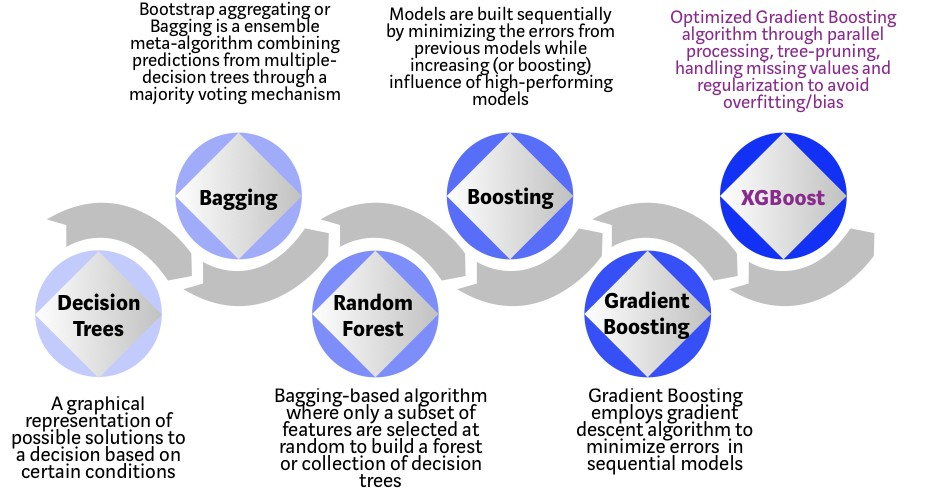

##### 6.2.9.1. Primera optimización de hiperparámetros

In [20]:
import json
from datetime import datetime
from hyperopt import fmin, hp, tpe, space_eval, Trials

# Función para la impresión de resultados.
def hyperopt_printer(trials):
    print('\nBest Trial:')
    print('Trial ID :', trials.best_trial['tid'])
    print('Loss :', trials.best_trial['result']['loss'])
    print('Params :', space_eval(search_space, best_params), end = '\n\n')

# Función para exportación de resultados a formato JSON.
def json_export(scorings):
    try:
        os.mkdir('HyperOpt Optimizations')
    except:
        None

    now = datetime.now()
    dt_string = now.strftime("%Y%m%d_%H%M%S")
    path = os.getcwd() + '\\HyperOpt Optimizations\\'
    filename = 'Opt_' + dt_string + '.json'

    f = open(path + filename, 'w')
    json.dump(scorings, f)
    f.close()
    print('Json file: ' + dt_string + '.json', end = '\n\n')

# Función para la obtención de resultados en formato tabla para visualizar scorings y desvios estándar.
def scorings_to_df(scorings):
    scorings_df = pd.DataFrame(columns = list(scorings[0]['scorings'].keys()))
    for scoring in scorings:
        scorings_df = scorings_df.append(scoring['scorings'], ignore_index = True)

    print('Scoring details:', end = '\n\n')
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 1000):  # more options can be specified also
        print(scorings_df)

In [17]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_validate, StratifiedShuffleSplit
from hyperopt import fmin, hp, tpe, space_eval, Trials
from hyperopt.early_stop import no_progress_loss

sss = StratifiedShuffleSplit(n_splits = 1, train_size = 0.1, random_state = 42)
indexes = list([train_index for train_index, test_index in sss.split(X, y)][0])

X_train = X.iloc[indexes, :]
y_train = y.iloc[indexes]

# Definición del espacio / dominio de parámetros.
search_space = {'n_estimators' : hp.randint('a', 5, 1000),
                'max_depth' : hp.randint('b', 3, 20),
                'random_state' : 42, 
                'tree_method' : 'gpu_hist', 
                'gpu_id' : 0,
                'learning_rate' : hp.choice('c', [0.01, 0.05, 0.1, 0.15, 0.2])           
                }

# Definición de la función objetivo.
def objective_func(search_space):
    
    global i, scorings, estimator, X_train, y_train
    start_time = time.time()
    i += 1
    
    clf = xgb.XGBClassifier(**search_space)
    skf = StratifiedKFold(random_state = 42, n_splits = 4, shuffle = True)
    cv = cross_validate(estimator = clf, X = X_train, y = y_train, cv = skf, verbose = 0, n_jobs = -1, scoring = ('precision', 'recall', 'roc_auc', 'accuracy', 'f1'))
    
    loss = 1 - cv['test_f1'].mean() + cv['test_f1'].std()

    scorings.append({'trial': i,
                     'search_space' : str(search_space),
                     'scorings' : {'Recall': cv['test_recall'].mean(),
                                   'Precision': cv['test_precision'].mean(),
                                   'AUC': cv['test_roc_auc'].mean(),
                                   'Accuracy': cv['test_accuracy'].mean(),
                                   'Recall_Std': cv['test_recall'].std(),
                                   'Precision_Std': cv['test_precision'].std(),
                                   'AUC_Std': cv['test_roc_auc'].std(),
                                   'Accuracy_Std': cv['test_accuracy'].std(),
                                   'F1-Score': cv['test_f1'].mean()}
                    }
                   )
    
    elapsed_time = time.time() - start_time
    
    print('Trial: %i | Loss: %.4f | Elapsed_time: %.4f seconds' % (i, loss, elapsed_time))
    
    return loss

# Ejecución del optimizador.
i = -1
scorings = []
rstate = np.random.default_rng(42)
trials = Trials() # Para el logging de resultados.
best_params = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, max_evals = 100, trials = trials, rstate = rstate)

Trial: 0 | Loss: 0.1604 | Elapsed_time: 36.4993 seconds                                                                
Trial: 1 | Loss: 0.1427 | Elapsed_time: 8.9524 seconds                                                                 
Trial: 2 | Loss: 0.2046 | Elapsed_time: 6.2151 seconds                                                                 
Trial: 3 | Loss: 0.1485 | Elapsed_time: 5.9427 seconds                                                                 
Trial: 4 | Loss: 0.1527 | Elapsed_time: 21.3550 seconds                                                                
Trial: 5 | Loss: 0.1567 | Elapsed_time: 11.4025 seconds                                                                
Trial: 6 | Loss: 0.1535 | Elapsed_time: 3.6197 seconds                                                                 
Trial: 7 | Loss: 0.1461 | Elapsed_time: 14.5919 seconds                                                                
Trial: 8 | Loss: 0.1768 | Elapsed_time: 

In [25]:
hyperopt_printer(trials)
json_export(scorings)
scorings_to_df(scorings)


Best Trial:
Trial ID : 20
Loss : 0.13923520387039723
Params : {'gpu_id': 0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 287, 'random_state': 42, 'tree_method': 'gpu_hist'}

Json file: 20220301_110121.json

Scoring details:

      Recall Precision       AUC  Accuracy Recall_Std Precision_Std   AUC_Std Accuracy_Std  F1-Score
0   0.774704  0.965925  0.998369  0.999674   0.029126      0.012985  0.001234     0.000042  0.859526
1   0.794494   0.96523  0.998302  0.999697   0.027237      0.009593  0.002083     0.000028    0.8712
2   0.709294  0.979512   0.96284  0.999605   0.043339      0.008091  0.031919     0.000048  0.821845
3   0.794484  0.964809  0.999307  0.999697   0.029581      0.008046  0.000378     0.000042  0.871155
4   0.792969  0.957706  0.999231  0.999688   0.028462      0.012733  0.000328     0.000044  0.867366
5   0.788396  0.955667  0.999168   0.99968   0.029588      0.011742  0.000417     0.000044  0.863768
6    0.78689  0.963199  0.998906  0.999686   0.029056    

##### 6.2.9.2. Segunda optimización de hiperparámetros

In [28]:
# Params : {'gpu_id': 0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 287, 'random_state': 42, 'tree_method': 'gpu_hist'}

import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_validate, StratifiedShuffleSplit
from hyperopt import fmin, hp, tpe, space_eval, Trials
from hyperopt.early_stop import no_progress_loss

sss = StratifiedShuffleSplit(n_splits = 1, train_size = 0.1, random_state = 42)
indexes = list([train_index for train_index, test_index in sss.split(X, y)][0])

X_train = X.iloc[indexes, :]
y_train = y.iloc[indexes]

# Definición del espacio / dominio de parámetros.
search_space = {'n_estimators' : 287,
                'max_depth' : 7,
                'random_state' : 42, 
                'tree_method' : 'gpu_hist', 
                'gpu_id' : 0,
                'learning_rate' : 0.05,
                'gamma' : hp.uniform('a', 0, 1),
                'min_child_weight' : hp.uniform('b', 0, 1),
                'max_delta_step' : hp.uniform('c', 0, 1),
                'subsample' : hp.uniform('d', 0, 1),
                'colsample_bytree' : hp.uniform('e', 0, 1),
                'colsample_bylevel' : hp.uniform('f', 0, 1),
                'colsample_bynode' : hp.uniform('g', 0, 1),
                'reg_alpha' : hp.uniform('h', 0, 1),
                'reg_lambda' : hp.uniform('i', 0, 1),
                'scale_pos_weight' : hp.uniform('j', 0, 1)
                }

# Definición de la función objetivo.
def objective_func(search_space):
    
    global i, scorings, estimator, X_train, y_train
    start_time = time.time()
    i += 1
    
    clf = xgb.XGBClassifier(**search_space)
    skf = StratifiedKFold(random_state = 42, n_splits = 4, shuffle = True)
    cv = cross_validate(estimator = clf, X = X_train, y = y_train, cv = skf, verbose = 0, n_jobs = -1, scoring = ('precision', 'recall', 'roc_auc', 'accuracy', 'f1'))
    
    loss = 1 - cv['test_f1'].mean() + cv['test_f1'].std()

    scorings.append({'trial': i,
                     'search_space' : str(search_space),
                     'scorings' : {'Recall': cv['test_recall'].mean(),
                                   'Precision': cv['test_precision'].mean(),
                                   'AUC': cv['test_roc_auc'].mean(),
                                   'Accuracy': cv['test_accuracy'].mean(),
                                   'Recall_Std': cv['test_recall'].std(),
                                   'Precision_Std': cv['test_precision'].std(),
                                   'AUC_Std': cv['test_roc_auc'].std(),
                                   'Accuracy_Std': cv['test_accuracy'].std(),
                                   'F1-Score': cv['test_f1'].mean()}
                    }
                   )
    
    elapsed_time = time.time() - start_time
    
    print('Trial: %i | Loss: %.4f | Elapsed_time: %.4f seconds' % (i, loss, elapsed_time))
    
    return loss

# Ejecución del optimizador.
i = -1
scorings = []
rstate = np.random.default_rng(42)
trials = Trials() # Para el logging de resultados.
best_params = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, max_evals = 100, trials = trials, rstate = rstate)

Trial: 0 | Loss: 1.0000 | Elapsed_time: 3.4508 seconds                                                                 
Trial: 1 | Loss: 1.0000 | Elapsed_time: 3.2265 seconds                                                                 
Trial: 2 | Loss: 1.0000 | Elapsed_time: 3.6712 seconds                                                                 
Trial: 3 | Loss: 1.0000 | Elapsed_time: 3.9724 seconds                                                                 
Trial: 4 | Loss: 1.0026 | Elapsed_time: 5.2749 seconds                                                                 
Trial: 5 | Loss: 0.2425 | Elapsed_time: 8.3376 seconds                                                                 
Trial: 6 | Loss: 1.0000 | Elapsed_time: 3.5965 seconds                                                                 
Trial: 7 | Loss: 1.0000 | Elapsed_time: 3.5351 seconds                                                                 
Trial: 8 | Loss: 0.8290 | Elapsed_time: 

In [29]:
hyperopt_printer(trials)
json_export(scorings)
scorings_to_df(scorings)


Best Trial:
Trial ID : 23
Loss : 0.15968534566137652
Params : {'colsample_bylevel': 0.67144859255828, 'colsample_bynode': 0.7831315094844271, 'colsample_bytree': 0.8014899183766985, 'gamma': 0.014974393635115657, 'gpu_id': 0, 'learning_rate': 0.05, 'max_delta_step': 0.9959894166399985, 'max_depth': 7, 'min_child_weight': 0.7431045276160863, 'n_estimators': 287, 'random_state': 42, 'reg_alpha': 0.5395766188121431, 'reg_lambda': 0.3611246194409444, 'scale_pos_weight': 0.9983922138002084, 'subsample': 0.9933497238368184, 'tree_method': 'gpu_hist'}

Json file: 20220301_112146.json

Scoring details:

      Recall Precision       AUC  Accuracy Recall_Std Precision_Std   AUC_Std Accuracy_Std  F1-Score
0        0.0       0.0  0.732324  0.998709        0.0           0.0  0.026705     0.000003       0.0
1        0.0       0.0       0.5  0.998709        0.0           0.0       0.0     0.000003       0.0
2        0.0       0.0  0.911633  0.998709        0.0           0.0  0.021581     0.000003   

##### 6.2.9.3. Tercera optimización de hiperparámetros

In [31]:
# Params : {'colsample_bylevel': 0.67144859255828, 'colsample_bynode': 0.7831315094844271, 'colsample_bytree': 0.8014899183766985, 
# 'gamma': 0.014974393635115657, 'gpu_id': 0, 'learning_rate': 0.05, 'max_delta_step': 0.9959894166399985, 'max_depth': 7, 
# 'min_child_weight': 0.7431045276160863, 'n_estimators': 287, 'random_state': 42, 'reg_alpha': 0.5395766188121431, 'reg_lambda': 0.3611246194409444, 
# 'scale_pos_weight': 0.9983922138002084, 'subsample': 0.9933497238368184, 'tree_method': 'gpu_hist'}

import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_validate, StratifiedShuffleSplit
from hyperopt import fmin, hp, tpe, space_eval, Trials
from hyperopt.early_stop import no_progress_loss

sss = StratifiedShuffleSplit(n_splits = 1, train_size = 0.1, random_state = 42)
indexes = list([train_index for train_index, test_index in sss.split(X, y)][0])

X_train = X.iloc[indexes, :]
y_train = y.iloc[indexes]

# Definición del espacio / dominio de parámetros.
search_space = {'n_estimators': hp.randint('a', 1, 1000), 'colsample_bylevel': 0.67144859255828, 'colsample_bynode': 0.7831315094844271, 'colsample_bytree': 0.8014899183766985, 
                'gamma': 0.014974393635115657, 'gpu_id': 0, 'learning_rate': 0.05, 'max_delta_step': 0.9959894166399985, 'max_depth': 7, 
                'min_child_weight': 0.7431045276160863, 'random_state': 42, 'reg_alpha': 0.5395766188121431, 'reg_lambda': 0.3611246194409444, 
                'scale_pos_weight': 0.9983922138002084, 'subsample': 0.9933497238368184, 'tree_method': 'gpu_hist'}

# Definición de la función objetivo.
def objective_func(search_space):
    
    global i, scorings, estimator, X_train, y_train
    start_time = time.time()
    i += 1
    
    clf = xgb.XGBClassifier(**search_space)
    skf = StratifiedKFold(random_state = 42, n_splits = 4, shuffle = True)
    cv = cross_validate(estimator = clf, X = X_train, y = y_train, cv = skf, verbose = 0, n_jobs = -1, scoring = ('precision', 'recall', 'roc_auc', 'accuracy', 'f1'))
    
    loss = 1 - cv['test_f1'].mean() + cv['test_f1'].std()

    scorings.append({'trial': i,
                     'search_space' : str(search_space),
                     'scorings' : {'Recall': cv['test_recall'].mean(),
                                   'Precision': cv['test_precision'].mean(),
                                   'AUC': cv['test_roc_auc'].mean(),
                                   'Accuracy': cv['test_accuracy'].mean(),
                                   'Recall_Std': cv['test_recall'].std(),
                                   'Precision_Std': cv['test_precision'].std(),
                                   'AUC_Std': cv['test_roc_auc'].std(),
                                   'Accuracy_Std': cv['test_accuracy'].std(),
                                   'F1-Score': cv['test_f1'].mean()}
                    }
                   )
    
    elapsed_time = time.time() - start_time
    
    print('Trial: %i | Loss: %.4f | Elapsed_time: %.4f seconds' % (i, loss, elapsed_time))
    
    return loss

# Ejecución del optimizador.
i = -1
scorings = []
rstate = np.random.default_rng(42)
trials = Trials() # Para el logging de resultados.
best_params = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, max_evals = 20, trials = trials, rstate = rstate)

Trial: 0 | Loss: 1.0000 | Elapsed_time: 1.2411 seconds                                                                 
Trial: 1 | Loss: 0.1482 | Elapsed_time: 30.3693 seconds                                                                
Trial: 2 | Loss: 0.4813 | Elapsed_time: 4.2402 seconds                                                                 
Trial: 3 | Loss: 0.1481 | Elapsed_time: 23.0924 seconds                                                                
Trial: 4 | Loss: 0.1581 | Elapsed_time: 10.8071 seconds                                                                
Trial: 5 | Loss: 0.1482 | Elapsed_time: 26.5306 seconds                                                                
Trial: 6 | Loss: 0.1482 | Elapsed_time: 27.0549 seconds                                                                
Trial: 7 | Loss: 0.1560 | Elapsed_time: 17.4966 seconds                                                                
Trial: 8 | Loss: 1.0000 | Elapsed_time: 

In [32]:
hyperopt_printer(trials)
json_export(scorings)
scorings_to_df(scorings)


Best Trial:
Trial ID : 3
Loss : 0.14813874213581021
Params : {'colsample_bylevel': 0.67144859255828, 'colsample_bynode': 0.7831315094844271, 'colsample_bytree': 0.8014899183766985, 'gamma': 0.014974393635115657, 'gpu_id': 0, 'learning_rate': 0.05, 'max_delta_step': 0.9959894166399985, 'max_depth': 7, 'min_child_weight': 0.7431045276160863, 'n_estimators': 630, 'random_state': 42, 'reg_alpha': 0.5395766188121431, 'reg_lambda': 0.3611246194409444, 'scale_pos_weight': 0.9983922138002084, 'subsample': 0.9933497238368184, 'tree_method': 'gpu_hist'}

Json file: 20220301_114133.json

Scoring details:

      Recall Precision       AUC  Accuracy Recall_Std Precision_Std   AUC_Std Accuracy_Std  F1-Score
0        0.0       0.0  0.519754  0.998709        0.0           0.0  0.002624     0.000003       0.0
1   0.776247  0.979217  0.998318   0.99969   0.022634      0.013991  0.001906      0.00003  0.865734
2   0.397145       1.0  0.994407  0.999222   0.047902           0.0  0.001127      0.00006   0

##### 6.2.9.4. Evaluación en el conjunto de validación

In [36]:
# Evaluación con el conjunto de validación.
import xgboost as xgb
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

params = {'n_estimators': 630, 'colsample_bylevel': 0.67144859255828, 'colsample_bynode': 0.7831315094844271, 'colsample_bytree': 0.8014899183766985, 
            'gamma': 0.014974393635115657, 'gpu_id': 0, 'learning_rate': 0.05, 'max_delta_step': 0.9959894166399985, 'max_depth': 7, 
            'min_child_weight': 0.7431045276160863, 'random_state': 42, 'reg_alpha': 0.5395766188121431, 'reg_lambda': 0.3611246194409444, 
            'scale_pos_weight': 0.9983922138002084, 'subsample': 0.9933497238368184, 'tree_method': 'gpu_hist'}

clf = xgb.XGBClassifier(**params)

X_train = X
y_train = y

X_test = df_validation.drop(labels = ['isFraud', 'isFlaggedFraud'], axis = 1, inplace = False)
y_test = df_validation['isFraud']

clf.fit(X = X_train, y = y_train)

y_pred = clf.predict(X_test)

print('Recall: %.4f' % recall_score(y_true = y_test, y_pred = y_pred))
print('Precision: %.4f' % precision_score(y_true = y_test, y_pred = y_pred))
print('AUC: %.4f' % roc_auc_score(y_true = y_test, y_score = y_pred))
print('Accuracy: %.4f' % accuracy_score(y_true = y_test, y_pred = y_pred))
print('F1-Score: %.4f' % f1_score(y_true = y_test, y_pred = y_pred))

[11:53:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Recall: 0.8357
Precision: 0.9744
AUC: 0.9178
Accuracy: 0.9998
F1-Score: 0.8997


## Otros

##### *Optimización con Optuna*

In [ ]:
# https://optuna.org/
# https://towardsdatascience.com/tuning-hyperparameters-with-optuna-af342facc549